In [1]:
import numpy as np
# from qutip import *
from scipy.sparse import diags
import scipy.linalg as la
import math as math
import matplotlib.pyplot as plt
import timeit
import seaborn as sns
from matplotlib import ticker
import matplotlib.patches as mpatches
st = sns.axes_style("ticks")
sns.set(style = st,palette = sns.color_palette("muted"), rc={'figure.figsize': (12,9)})

# np.set_printoptions(threshold=np.inf)
   
#sns.set(color_codes = True)
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.sans-serif": ["Computer Modern Roman"]})


from numpy import ndarray
import matplotlib.cm as cm

class myarray(ndarray):    
    @property
    def H(self):
        return self.conj().T

In [1]:
L = 10

def check_symmetric(a, rtol=1e-05, atol=1e-08):
    return np.allclose(a, a.T, rtol=rtol, atol=atol)

cycles=10

basis = [(x, y) for x in range(0, L) for y in range(0, L)]
print(basis)

def ind_to_coord(L, ind):
    x = ind % L
    y = ind // L
    return x, y
def coord_to_ind(L, x, y):
    return y * L + (x) % L


# print(coord_to_ind(30, 21,1))
# print(basis.index((1,21)))
# Coordinates are flipped here for the two methods (my x is his y and vice versa)

# print(basis)

T_0 = -0.05
T_1 = 0.05

# T_0 = 0.95
# T_1 = 0.05

T_0 = T_0 * L
T_1 = T_1 * L

#Should be correct
def fermions2D(L, envelope):
    N = L * L
    ham = np.zeros((N, N), dtype=float)
    for i in range(N):
        x = i % L
        y = i // L
        right = y * L + (x + 1) % L
        down = ((y + 1) % L) * L + x
        ham[i, right] = -envelope(x + 0.5) * envelope(y)
        ham[i, down] = -envelope(x) * envelope(y + 0.5)
        ham[right, i] = np.conjugate(ham[i, right])
        ham[down, i] = np.conjugate(ham[i, down])
    return ham

def F(x):
    return 2*np.sin(np.pi*x/L)**2

def ssd(x, L):
    return np.sin(np.pi * (x + 0.5) / L)**2*np.sin(np.pi * (x + 0.5) / L)**2

hamSSD = fermions2D(L, lambda i: ssd(i, L))
ham0 = fermions2D(L, lambda i: 1)

def F(x,y):
    return 2*np.sin(np.pi*x/L)**2*np.sin(np.pi*y/L)**2

t_1 = -1
t_2 = -1

vals0, U = np.linalg.eigh(ham0)
vals1, V = np.linalg.eigh(hamSSD)

U = np.matrix(U)
V = np.matrix(V)

Npar = np.where(vals0 < 1e-7)[0].shape[0]
# print(L**2/2)
# print(Npar)

def prepareState(vals, vecs, N):
    Wbar = np.matrix(vecs)
    init_state = Wbar[:, :N] @ ((Wbar.H)[:N, :])
    return init_state


# This state definition is correct
# state = prepareState(vals0, U, int(L**2/2))

state = U[:,:Npar]@((U.H)[:Npar,:])
print(np.shape(state))


occupationnumber = np.zeros((L, L), dtype =complex)


for i in range(0, L-1):
    for j in range(0, L-1):
        term1 = state[basis.index((i,j)),basis.index((i,j))]
#         term2 = state[basis.index((j,i)),basis.index((j,i))]
        occupationnumber[i,j]= t_1*term1



threeDplot(occupationnumber, L)


def threeDplot(arr: np.ndarray, L):
    x = [i for i in range(0, L)]
    y = [i for i in range(0, L)]
    print(x)
    print(np.shape(arr))
#     y = [i for i in range(0, L)]
    fig = plt.figure()
    ax = fig.add_subplot(projection = '3d')
    
    X, Y = np.meshgrid(x,y)
    print(np.shape(X))
    
    ax.plot_surface(X, Y, arr)

#     ax.plot = ax.plot_surface(x, y, Z=z, rstride = 40,cstride = 40, cmap = cm.hot)
#     ax.set_zlim(-0.1,0.1)
    
#     ax.plot_surface(x,y, arr, rstride = 40, cstride = 40)
#     fig.tightlayout()
    plt.show()
# state = U[:,:int(L**2/2)]@((U.H)[:int(L**2/2),:])


# state = U[:,:int(L**2/2)]@((U.H)[:int(L**2/2),:])
# print(state)

# state = np.real(np.load("initialstate.npy"))

# print(np.allclose(state, state1))

# State implementation for ground state is correct

def obtainGroundStateEnergy(state,L):
    Ground_State_Energy_H0 = 0
    for i in range(0, L-1):
        for j in range(0, L-1):
            term1 = state[basis.index((i,j)),basis.index((i+1,j))]
            term2 = state[basis.index((i+1,j)), basis.index((i,j))]
            term3 = state[basis.index((i,j)),basis.index((i,j+1))]
            term4 = state[basis.index((i,j+1)),basis.index((i,j))]
            Ground_State_Energy_H0 += -term1 -term2 -term3 -term4
    return Ground_State_Energy_H0

# for i in range(0,L):
#     for j in range(0,L):
#         if i == L-1 and j != L-1:
#             term1 = state[basis.index((i,j)),basis.index((0,j))]
#             term2 = state[basis.index((0,j)), basis.index((i,j))]
#             term3 = state[basis.index((i,j)),basis.index((i,j+1))]
#             term4 = state[basis.index((i,j+1)),basis.index((i,j))]  
#         elif j == L-1 and i != L-1:
#             term3 = state[basis.index((i,j)),basis.index((i,0))]
#             term4 = state[basis.index((i,0)),basis.index((i,j))]
#             term1 = state[basis.index((i,j)),basis.index((i+1,j))]
#             term2 = state[basis.index((i+1,j)), basis.index((i,j))]
#         elif i == L-1 and j == L-1:
#             term1 = state[basis.index((i,j)),basis.index((0,j))]
#             term2 = state[basis.index((0,j)), basis.index((i,j))]
#             term3 = state[basis.index((i,j)),basis.index((i,0))]
#             term4 = state[basis.index((i,0)),basis.index((i,j))]
#         else:
#             term1 = state[basis.index((i,j)),basis.index((i+1,j))]
#             term2 = state[basis.index((i+1,j)), basis.index((i,j))]
#             term3 = state[basis.index((i,j)),basis.index((i,j+1))]
#             term4 = state[basis.index((i,j+1)),basis.index((i,j))]  
#         E_density1[i,j] = t_1*term1 + t_1*term2 + t_2*term3 + t_2*term4
#         E_density1 = np.real(E_density1)

# CORRECT
# for i  in range(0,L):
#     for j in range(0,L):
#         if i == L-1 and j != L-1:
#             term1 = state[basis.index((i,j)),basis.index((0,j))]
#             term2 = state[basis.index((0,j)), basis.index((i,j))]
#             term3 = state[basis.index((i,j)),basis.index((i,j+1))]
#             term4 = state[basis.index((i,j+1)),basis.index((i,j))]  
#         elif j == L-1 and i != L-1:
#             term3 = state[basis.index((i,j)),basis.index((i,0))]
#             term4 = state[basis.index((i,0)),basis.index((i,j))]
#             term1 = state[basis.index((i,j)),basis.index((i+1,j))]
#             term2 = state[basis.index((i+1,j)), basis.index((i,j))]
#         elif i == L-1 and j == L-1:
#             term1 = state[basis.index((i,j)),basis.index((0,j))]
#             term2 = state[basis.index((0,j)), basis.index((i,j))]
#             term3 = state[basis.index((i,j)),basis.index((i,0))]
#             term4 = state[basis.index((i,0)),basis.index((i,j))]
#         else:
#             term1 = state[basis.index((i,j)),basis.index((i+1,j))]
#             term2 = state[basis.index((i+1,j)), basis.index((i,j))]
#             term3 = state[basis.index((i,j)),basis.index((i,j+1))]
#             term4 = state[basis.index((i,j+1)),basis.index((i,j))]  
#         E_density1[i,j] = t_1*term1 + t_1*term2 + t_2*term3 + t_2*term4
#         E_density1 = np.real(E_density1)



# for j in range(0, L):
#     for i in range(0, L):
#             if i == L-1:
#                 term1 = state[basis.index((i,j)),basis.index((0,j))]
#                 term2 = state[basis.index((0,j)), basis.index((i,j))]
#             else:
#                 term1 = state[basis.index((i,j)),basis.index((i+1,j))]
#                 term2 = state[basis.index((i+1,j)), basis.index((i,j))]
#             if j == L-1:
#                 term3 = state[basis.index((i,j)),basis.index((i,0))]
#                 term4 = state[basis.index((i,0)),basis.index((i,j))]
#             else:
#                 term3 = state[basis.index((i,j)),basis.index((i,j+1))]
#                 term4 = state[basis.index((i,j+1)),basis.index((i,j))]
#             E_density[i,j] = t_1*term1 + t_1*term2 + t_2*term3 + t_2*term4
#             E_density = np.real(E_density)


# CORRECT
# for i in range(0,L):
#     for j in range(0,L):
#         if i == L-1 and j != L-1:
#             term1 = state[coord_to_ind(L, L-1, j), coord_to_ind(L, 0, j)]
#             term2 = state[coord_to_ind(L, 0, j), coord_to_ind(L, i, j)]
#             term3 = state[coord_to_ind(L, L-1, j), coord_to_ind(L, L-1, j+1)]
#             term4 = state[coord_to_ind(L, L-1, j+1), coord_to_ind(L, i, j)]
#             E_density[i,j] = t_1*term1 + t_1*term2 + t_2*term3 + t_2*term4
# #             print(t_1*term1 + t_1*term2 + t_2*term3 + t_2*term4)
#         elif j == L-1 and i != L-1:
#             term3 = state[coord_to_ind(L, i, L-1), coord_to_ind(L, i, 0)]
#             term4 = state[coord_to_ind(L, i, 0), coord_to_ind(L, i, j)]
#             term1 = state[coord_to_ind(L, i, j), coord_to_ind(L, i+1, j)]
#             term2 = state[coord_to_ind(L, i+1, j), coord_to_ind(L, i, j)]
#             E_density[i,j] = t_1*term1 + t_1*term2 + t_2*term3 + t_2*term4
# #             print(t_1*term1 + t_1*term2 + t_2*term3 + t_2*term4)
#         elif i == L-1 and j == L-1:
#             term1 = state[coord_to_ind(L, L-1, L-1), coord_to_ind(L, 0, L-1)]
#             term2 = state[coord_to_ind(L, 0, L-1), coord_to_ind(L, L-1, L-1)]
#             term3 = state[coord_to_ind(L, L-1, L-1), coord_to_ind(L, L-1, 0)]
#             term4 = state[coord_to_ind(L, L-1, 0), coord_to_ind(L, L-1, L-1)]
#             E_density[i,j] = t_1*term1 + t_1*term2 + t_2*term3 + t_2*term4
# #             print(t_1*term1 + t_1*term2 + t_2*term3 + t_2*term4)
#         else:
#             term1 = state[coord_to_ind(L, i, j), coord_to_ind(L, i+1, j)]
#             term2 = state[coord_to_ind(L, i+1, j), coord_to_ind(L, i, j)]
#             term3 = state[coord_to_ind(L, i, j), coord_to_ind(L, i, j+1)]
#             term4 = state[coord_to_ind(L, i, j+1), coord_to_ind(L, i, j)]
#             E_density[i,j] = t_1*term1 + t_1*term2 + t_2*term3 + t_2*term4
# #             print(t_1*term1 + t_1*term2 + t_2*term3 + t_2*term4)
            
for i in range(0,L):
    for j in range(0,L):
        E_density[L-1,L-1] = t_1*state[coord_to_ind(L, L-1, L-1), coord_to_ind(L, 0, L-1)] + t_1*state[coord_to_ind(L, 0, L-1), coord_to_ind(L, L-1, L-1)] + t_2*state[coord_to_ind(L, L-1, L-1), coord_to_ind(L, L-1, 0)] + t_2*state[coord_to_ind(L, L-1, 0), coord_to_ind(L, L-1, L-1)]
        if i == L-1 and j != L-1:
            E_density[L-1,j] = t_1*state[coord_to_ind(L, L-1, j), coord_to_ind(L, 0, j)] + t_1*state[coord_to_ind(L, 0, j), coord_to_ind(L, i, j)] + t_2*state[coord_to_ind(L, L-1, j), coord_to_ind(L, L-1, j+1)] + t_2*state[coord_to_ind(L, L-1, j+1), coord_to_ind(L, i, j)]
        elif j == L-1 and i != L-1:
            E_density[i,L-1] = t_1*state[coord_to_ind(L, i, L-1), coord_to_ind(L, i+1, L-1)] + t_1*state[coord_to_ind(L, i+1, L-1), coord_to_ind(L, i, L-1)] + t_2*state[coord_to_ind(L, i, L-1), coord_to_ind(L, i, 0)] + t_2*state[coord_to_ind(L, i, 0), coord_to_ind(L, i, L-1)]
        if i!= L-1 and j!= L-1:
            E_density[i,j] = t_1*state[coord_to_ind(L, i, j), coord_to_ind(L, i+1, j)] + t_1*state[coord_to_ind(L, i+1, j), coord_to_ind(L, i, j)] + t_2*state[coord_to_ind(L, i, j), coord_to_ind(L, i, j+1)] + t_2*state[coord_to_ind(L, i, j+1), coord_to_ind(L, i, j)]          
    
E_density = np.real(E_density)



    

#HEATMAP
# fig = plt.figure()
# ax1 = fig.add_subplot(121)
# # ax1.imshow(np.real(E_density), cmap = 'summer', interpolation = 'bilinear')
# ax1.imshow(np.real(E_density), cmap = 'summer')
# plt.show()

# for i in range(0,L):
#     for j in range(0,L):
#         if i == L-1 and j != L-1:
#             term1 = state[coord_to_ind(L, j, i), coord_to_ind(L, 0, j)]
#             term2 = state[coord_to_ind(L, 0, j), coord_to_ind(L, i, j)]
#             term3 = state[coord_to_ind(L, i, j), coord_to_ind(L, i, j+1)]
#             term4 = state[coord_to_ind(L, i, j+1), coord_to_ind(L, i, j)]
#         elif j == L-1 and i != L-1:
#             term3 = state[coord_to_ind(L, i, j), coord_to_ind(L, i, 0)]
#             term4 = state[coord_to_ind(L, i, 0), coord_to_ind(L, i, j)]
#             term1 = state[coord_to_ind(L, i, j), coord_to_ind(L, i+1, j)]
#             term2 = state[coord_to_ind(L, i+1, j), coord_to_ind(L, i, j)]
#         elif i == L-1 and j == L-1:
#             term1 = state[coord_to_ind(L, i, j), coord_to_ind(L, 0, j)]
#             term2 = state[coord_to_ind(L, 0, j), coord_to_ind(L, i, j)]
#             term3 = state[coord_to_ind(L, i, j), coord_to_ind(L, i, 0)]
#             term4 = state[coord_to_ind(L, i, 0), coord_to_ind(L, i, j)]
#         else:
#             term1 = state[coord_to_ind(L, i, j), coord_to_ind(L, i+1, j)]
#             term2 = state[coord_to_ind(L, i+1, j), coord_to_ind(L, i, j)]
#             term3 = state[coord_to_ind(L, i, j), coord_to_ind(L, i, j+1)]
#             term4 = state[coord_to_ind(L, i, j+1), coord_to_ind(L, i, j)]
#         E_density[i,j] = t_1*term1 + t_1*term2 + t_2*term3 + t_2*term4
#         E_density = np.real(E_density)
   
# print("My Energy_Density")
# print(E_density1)
# print("Your Energy Density")
# print(E_density)   
# print("Comparison")
# print(E_density1 == E_density)        
def heatmap2d(arr: np.ndarray):
    plt.imshow(arr, cmap='viridis', interpolation = 'nearest')
#     plt.imshow(arr, cmap='winter', interpolation = 'nearest')
#     plt.imshow(arr, cmap= 'magma', interpolation = 'nearest')
    plt.colorbar()
    plt.title( "Energy Density Heat Map" )
    plt.xlim(0, L-1)
    plt.ylim(0, L-1)
    plt.xlabel(r'Lattice Site $x$', fontsize = 18)
    plt.ylabel(r'Lattice Site $y$',fontsize = 18)
#     plt.colorbar()
    plt.show()
    
# heatmap2d(E_density)


[(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (2, 0), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (2, 9), (3, 0), (3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (4, 0), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (5, 0), (5, 1), (5, 2), (5, 3), (5, 4), (5, 5), (5, 6), (5, 7), (5, 8), (5, 9), (6, 0), (6, 1), (6, 2), (6, 3), (6, 4), (6, 5), (6, 6), (6, 7), (6, 8), (6, 9), (7, 0), (7, 1), (7, 2), (7, 3), (7, 4), (7, 5), (7, 6), (7, 7), (7, 8), (7, 9), (8, 0), (8, 1), (8, 2), (8, 3), (8, 4), (8, 5), (8, 6), (8, 7), (8, 8), (8, 9), (9, 0), (9, 1), (9, 2), (9, 3), (9, 4), (9, 5), (9, 6), (9, 7), (9, 8), (9, 9)]


NameError: name 'np' is not defined

In [ ]:
E_density_cycles = np.zeros((L, L), dtype = complex)
exponential_E0 = np.exp(-1j*T_0*vals0)
exponential_E1 = np.exp(-1j*T_1*vals1)
exponential_E0 = np.matrix(np.diag(exponential_E0))
exponential_E1 = np.matrix(np.diag(exponential_E1))

W = V.H@U  
W1_T1 = exponential_E1@W
W0_T0 = exponential_E0@(W.H)
W_total = W0_T0@W1_T1
mathcalW1 = U
distribution = np.zeros(shape=(int(L**2)))
distribution[: int(L**2 / 2)] = 1
# state_ev = np.matrix(np.einsum(“ik, kj, k -> ij”, mathcalW, mathcalW.H, distribution))

# This seems correct
# mathcalW = np.dot(U, np.linalg.matrix_power(W_total, cycles))

for i in range(cycles):
    mathcalW1 = mathcalW1@W_total
# print(np.allclose(mathcalW1, mathcalW))

# state_ev = mathcalW[:,:int(L**2/2)]@((mathcalW.H)[:int(L**2/2),:])
state_ev = np.matrix(np.einsum("ik, kj, k -> ij", mathcalW1, mathcalW1.H, distribution))
# print(np.allclose(state_ev1, state_ev))
# state_ev1 and state_ev are identical

for i in range(0,L):
    for j in range(0,L):
        E_density_cycles[L-1,L-1] = t_1*state_ev[coord_to_ind(L, L-1, L-1), coord_to_ind(L, 0, L-1)] + t_1*state_ev[coord_to_ind(L, 0, L-1), coord_to_ind(L, L-1, L-1)] + t_2*state_ev[coord_to_ind(L, L-1, L-1), coord_to_ind(L, L-1, 0)] + t_2*state_ev[coord_to_ind(L, L-1, 0), coord_to_ind(L, L-1, L-1)]
        if i == L-1 and j != L-1:
            E_density_cycles[L-1,j] = t_1*state_ev[coord_to_ind(L, L-1, j), coord_to_ind(L, 0, j)] + t_1*state_ev[coord_to_ind(L, 0, j), coord_to_ind(L, i, j)] + t_2*state_ev[coord_to_ind(L, L-1, j), coord_to_ind(L, L-1, j+1)] + t_2*state_ev[coord_to_ind(L, L-1, j+1), coord_to_ind(L, i, j)]
        elif j == L-1 and i != L-1:
            E_density_cycles[i,L-1] = t_1*state_ev[coord_to_ind(L, i, L-1), coord_to_ind(L, i+1, L-1)] + t_1*state_ev[coord_to_ind(L, i+1, L-1), coord_to_ind(L, i, L-1)] + t_2*state_ev[coord_to_ind(L, i, L-1), coord_to_ind(L, i, 0)] + t_2*state_ev[coord_to_ind(L, i, 0), coord_to_ind(L, i, L-1)]
        if i!= L-1 and j!= L-1:
            E_density_cycles[i,j] = t_1*state_ev[coord_to_ind(L, i, j), coord_to_ind(L, i+1, j)] + t_1*state_ev[coord_to_ind(L, i+1, j), coord_to_ind(L, i, j)] + t_2*state_ev[coord_to_ind(L, i, j), coord_to_ind(L, i, j+1)] + t_2*state_ev[coord_to_ind(L, i, j+1), coord_to_ind(L, i, j)]          
E_density_cycles = np.real(E_density_cycles)




threeDplot(E_density_cycles)
# for i in range(0,L):
#     for j in range(0,L):
#         if i == L-1 and j != L-1:
#             term1 = state[coord_to_ind(L, L-1, j), coord_to_ind(L, 0, j)]
#             term2 = state[coord_to_ind(L, 0, j), coord_to_ind(L, i, j)]
#             term3 = state[coord_to_ind(L, L-1, j), coord_to_ind(L, L-1, j+1)]
#             term4 = state[coord_to_ind(L, L-1, j+1), coord_to_ind(L, i, j)]
#             E_density[i,j] = t_1*term1 + t_1*term2 + t_2*term3 + t_2*term4
# #             print(t_1*term1 + t_1*term2 + t_2*term3 + t_2*term4)
#         elif j == L-1 and i != L-1:
#             term3 = state[coord_to_ind(L, i, L-1), coord_to_ind(L, i, 0)]
#             term4 = state[coord_to_ind(L, i, 0), coord_to_ind(L, i, j)]
#             term1 = state[coord_to_ind(L, i, j), coord_to_ind(L, i+1, j)]
#             term2 = state[coord_to_ind(L, i+1, j), coord_to_ind(L, i, j)]
#             E_density[i,j] = t_1*term1 + t_1*term2 + t_2*term3 + t_2*term4
# #             print(t_1*term1 + t_1*term2 + t_2*term3 + t_2*term4)
#         elif i == L-1 and j == L-1:
#             term1 = state[coord_to_ind(L, L-1, L-1), coord_to_ind(L, 0, L-1)]
#             term2 = state[coord_to_ind(L, 0, L-1), coord_to_ind(L, L-1, L-1)]
#             term3 = state[coord_to_ind(L, L-1, L-1), coord_to_ind(L, L-1, 0)]
#             term4 = state[coord_to_ind(L, L-1, 0), coord_to_ind(L, L-1, L-1)]
#             E_density[i,j] = t_1*term1 + t_1*term2 + t_2*term3 + t_2*term4
# #             print(t_1*term1 + t_1*term2 + t_2*term3 + t_2*term4)
#         else:
#             term1 = state[coord_to_ind(L, i, j), coord_to_ind(L, i+1, j)]
#             term2 = state[coord_to_ind(L, i+1, j), coord_to_ind(L, i, j)]
#             term3 = state[coord_to_ind(L, i, j), coord_to_ind(L, i, j+1)]
#             term4 = state[coord_to_ind(L, i, j+1), coord_to_ind(L, i, j)]
#             E_density[i,j] = t_1*term1 + t_1*term2 + t_2*term3 + t_2*term4
# #             print(t_1*term1 + t_1*term2 + t_2*term3 + t_2*term4)




# for j in range(0,L):
#     for i in range(0,L):
#         if i == L-1 and j != L-1:
#             term1 = state[basis.index((i,j)),basis.index((0,j))]
#             term2 = state[basis.index((0,j)), basis.index((i,j))]
#             term3 = state[basis.index((i,j)),basis.index((i,j+1))]
#             term4 = state[basis.index((i,j+1)),basis.index((i,j))]  
#         elif j == L-1 and i != L-1:
#             term3 = state[basis.index((i,j)),basis.index((i,0))]
#             term4 = state[basis.index((i,0)),basis.index((i,j))]
#             term1 = state[basis.index((i,j)),basis.index((i+1,j))]
#             term2 = state[basis.index((i+1,j)), basis.index((i,j))]
#         elif i == L-1 and j == L-1:
#             term1 = state[basis.index((i,j)),basis.index((0,j))]
#             term2 = state[basis.index((0,j)), basis.index((i,j))]
#             term3 = state[basis.index((i,j)),basis.index((i,0))]
#             term4 = state[basis.index((i,0)),basis.index((i,j))]
#         else:
#             term1 = state[basis.index((i,j)),basis.index((i+1,j))]
#             term2 = state[basis.index((i+1,j)), basis.index((i,j))]
#             term3 = state[basis.index((i,j)),basis.index((i,j+1))]
#             term4 = state[basis.index((i,j+1)),basis.index((i,j))]  
#         E_density_cycles[i,j] = t_1*term1 + t_1*term2 + t_2*term3 + t_2*term4
#         E_density_cycles = np.real(E_density_cycles)

heatmap2d(E_density_cycles, L =12)
plt.show()



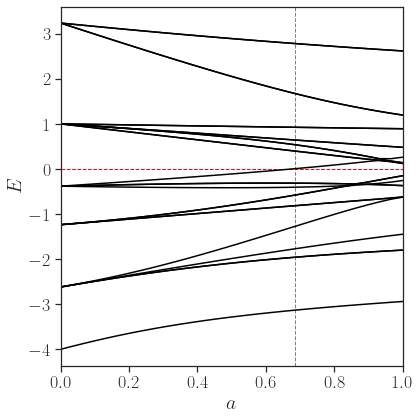

In [187]:
fontSize = 20
ticksize = 18
L = 5
def fermions2D(L, a, envelope):
    N = L * L
    ham = np.zeros((N, N), dtype=float)
    for i in range(N):
        x = i % L
        y = i // L
        right = y * L + (x + 1) % L
        down = ((y + 1) % L) * L + x
        ham[i, right] = -((1-a) + a*envelope(x+0.5))
        ham[i, down] = -((1-a) + a*envelope(x+0.5))
        ham[right, i] = np.conjugate(ham[i, right])
        ham[down, i] = np.conjugate(ham[i, down])
    return ham

def ssd2(x, L):
    return np.sin(np.pi * (x - 0.5) / L)**2

a = np.linspace(0,1,30)
# x = np.empty((len(a),L**2), int)
# print(np.shape(x))

y = []

for i in a:
    hamSSD = fermions2D(L, i, lambda i: ssd2(i, L))
    eigvals1, V = np.linalg.eigh(hamSSD)
    eig = eigvals1.tolist()
    y.append(eig)
    
fig, ax2 = plt.subplots(1,1, figsize = (6,6))

plt.axhline(y = 0, color = 'r', linestyle = '--', linewidth = 1)
plt.axvline(x = 0.685, color = 'grey', linestyle = '--', linewidth = 1)
ax2.plot(a,y,'-', color = 'black')
# ax2.plot(n,measurement, '--', linewidth = 1, color = 'grey')
    
#     ax2.text(-1, 0.004, r"$T_0$ = {}L".format(T_0), color="black", fontsize=fontSize)
#     ax2.text(-1, 0.0042, r"$T_1$ = {}L".format(T_1), color="black", fontsize=fontSize)
#     ax2.text(-1, 0.0044, r"$L$ = {}".format(L), color="black", fontsize=fontSize)
#     ax2.text(-1, 0.0046, r"PBC = {}".format(PBC), color = "black", fontsize=fontSize)

formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) 
formatter.set_powerlimits((-1,1)) 
plt.xticks(fontsize=ticksize)
plt.yticks(fontsize=ticksize)
ax2.set_xlim(0,1)
# ax2.set_xlim(0.8,1.0)
# ax2.set_ylim(-0.5, 0.5)
# plt.ylim(-0.5,0.5)
    
ax2.yaxis.set_major_formatter(formatter) 
tx = ax2.yaxis.get_offset_text()
tx.set_fontsize(20)
    
ax2.set_ylabel(r"$E$", fontsize = fontSize)
ax2.set_xlabel(r"$a$", fontsize=fontSize)
plt.tight_layout()
plt.savefig('EvolutionEnergies2D.pdf')
plt.show()

# plt.scattter()

18
[[ 0. -1. -1. -1.  0.  0. -1.  0.  0.]
 [-1.  0. -1.  0. -1.  0.  0. -1.  0.]
 [-1. -1.  0.  0.  0. -1.  0.  0. -1.]
 [-1.  0.  0.  0. -1. -1. -1.  0.  0.]
 [ 0. -1.  0. -1.  0. -1.  0. -1.  0.]
 [ 0.  0. -1. -1. -1.  0.  0.  0. -1.]
 [-1.  0.  0. -1.  0.  0.  0. -1. -1.]
 [ 0. -1.  0.  0. -1.  0. -1.  0. -1.]
 [ 0.  0. -1.  0.  0. -1. -1. -1.  0.]]
-7.000000000000001


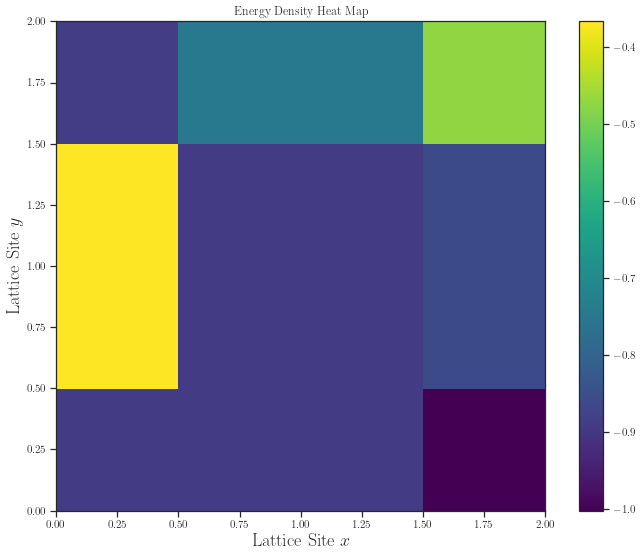

81
81
81
81
81
81
81
81
81
81
81


<ipython-input-8-4660cd56e711>:148: ComplexWarning: Casting complex values to real discards the imaginary part
  E_density_cycles[i,j] = -t_1*term1 + t_1*term2 + t_2*term3 + t_2*term4


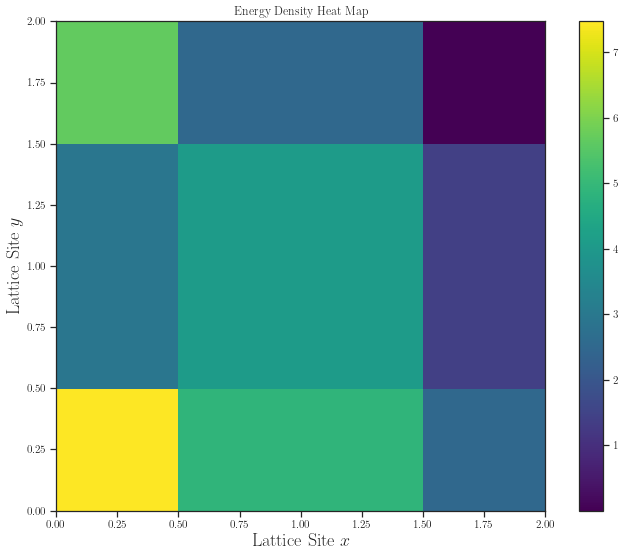

In [8]:
L = 3

def check_symmetric(a, rtol=1e-05, atol=1e-08):
    return np.allclose(a, a.T, rtol=rtol, atol=atol)

cycles=11

basis = [(x, y) for x in range(0, L) for y in range(0, L)]
print(np.size(basis))

T_0 = -0.05
T_1 = 0.05

# T_0 = 0.95
# T_1 = 0.05

T_0 = T_0 * L
T_1 = T_1 * L

def fermions2D(L, envelope):
    N = L * L
    ham = np.zeros((N, N), dtype=float)
    for i in range(N):
        x = i % L
        y = i // L
        right = y * L + (x + 1) % L
        down = ((y + 1) % L) * L + x
        ham[i, right] = -envelope(x + 0.5) * envelope(y)
        ham[i, down] = -envelope(x) * envelope(y + 0.5)
        ham[right, i] = np.conjugate(ham[i, right])
        ham[down, i] = np.conjugate(ham[i, down])
    return ham

def ssd(x, L):
    return np.sin(np.pi * (x + 0.5) / L) *  np.sin(np.pi * (x + 0.5) / L)

hamSSD = fermions2D(L, lambda i: ssd(i, L))
ham0 = fermions2D(L, lambda i: 1)
print(ham0)

t_1 = -1
t_2 = -1


eigvals0, U = np.linalg.eigh(ham0)
eigvals1, V = np.linalg.eigh(hamSSD)

U = np.matrix(U)
V = np.matrix(V)

Egs =np.sum(eigvals0[:int(L/2)])

E0 = np.exp(-1j*T_0*eigvals0)
E1 = np.exp(-1j*T_1*eigvals1)
E0 = np.matrix(np.diag(E0))
E1 = np.matrix(np.diag(E1))

W = V.H@U
mathcalW = U
Wbar = U
W1 = E1@W
W0 = E0@(W.H)
Wtotal = W0@W1

distribution = np.zeros(shape=(int(L*L)))
distribution[: int(L**2 / 2)] = 1


state = np.matrix(np.einsum("ik, kj, k -> ij", Wbar, Wbar.H, distribution))
# state = U[:,:int(L**2/2)]@((U.H)[:int(L**2/2),:])
# print(np.round(state0))
# print(np.round(state1))

# print(state0 == state1)

Ground_State_Energy_H0 = 0
for i in range(0, L):
    for j in range(0, L):
        if i == L-1:
            term1 = state[basis.index((i,j)),basis.index((0,j))]
            term2 = state[basis.index((0,j)), basis.index((i,j))]
        else:
            term1 = state[basis.index((i,j)),basis.index((i+1,j))]
            term2 = state[basis.index((i+1,j)), basis.index((i,j))]
        if j == L-1:
            term3 = state[basis.index((i,j)),basis.index((i,0))]
            term4 = state[basis.index((i,0)),basis.index((i,j))]
        else:
            term3 = state[basis.index((i,j)),basis.index((i,j+1))]
            term4 = state[basis.index((i,j+1)),basis.index((i,j))]
        Ground_State_Energy_H0 += t_1*term1 + t_1*term2 + t_2*term3 +t_2*term4
print(Ground_State_Energy_H0)

E_density = np.zeros((L, L))

for j in range(0, L):
    for i in range(0, L):
            if i == L-1:
                term1 = state[basis.index((i,j)),basis.index((0,j))]
                term2 = state[basis.index((0,j)), basis.index((i,j))]
            else:
                term1 = state[basis.index((i,j)),basis.index((i+1,j))]
                term2 = state[basis.index((i+1,j)), basis.index((i,j))]
            if j == L-1:
                term3 = state[basis.index((i,j)),basis.index((i,0))]
                term4 = state[basis.index((i,0)),basis.index((i,j))]
            else:
                term3 = state[basis.index((i,j)),basis.index((i,j+1))]
                term4 = state[basis.index((i,j+1)),basis.index((i,j))]
            E_density[i,j] = t_1*term1 + t_1*term2 + t_2*term3 + t_2*term4
            E_density = np.real(E_density)


def heatmap2d(arr: np.ndarray):
    plt.imshow(arr, cmap='viridis', interpolation = 'nearest')
#     plt.imshow(arr, cmap='winter', interpolation = 'nearest')
#     plt.imshow(arr, cmap= 'magma', interpolation = 'nearest')
    plt.colorbar()
    plt.title( "Energy Density Heat Map" )
    plt.xlim(0, L-1)
    plt.ylim(0, L-1)
    plt.xlabel(r'Lattice Site $x$', fontsize = 18)
    plt.ylabel(r'Lattice Site $y$',fontsize = 18)
    plt.show()
    
heatmap2d(E_density)
E_density_cycles = np.zeros((L, L))

for i in range(cycles):
    Wbar = Wbar @ Wtotal
#     state = Wbar[:, : int(L**2 / 2)] @ ((Wbar.H)[: int(L**2 / 2), :])
    state = np.matrix(np.einsum("ik, kj, k -> ij", Wbar, Wbar.H, distribution))
    print(state.size)
for j in range(0, L):
    for i in range(0, L):
            if i == L-1:
                term1 = state[basis.index((i,j)),basis.index((0,j))]
                term2 = state[basis.index((0,j)), basis.index((i,j))]
            else:
                term1 = state[basis.index((i,j)),basis.index((i+1,j))]
                term2 = state[basis.index((i+1,j)), basis.index((i,j))]
            if j == L-1:
                term3 = state[basis.index((i,j)),basis.index((i,0))]
                term4 = state[basis.index((i,0)),basis.index((i,j))]
            else:
                term3 = state[basis.index((i,j)),basis.index((i,j+1))]
                term4 = state[basis.index((i,j+1)),basis.index((i,j))]
            E_density_cycles[i,j] = -t_1*term1 + t_1*term2 + t_2*term3 + t_2*term4
            E_density_cycles = np.real(E_density_cycles) - E_density

heatmap2d(E_density_cycles)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import linalg as LA
from matplotlib.colors import LogNorm
from scipy import optimize
from scipy.integrate import complex_ode
import scipy as sp
import matplotlib
import copy
import math


def ssd(x, L):
    return 2 * np.sin(np.pi * (x + 1) / L) * np.sin(np.pi * (x + 1) / L)


def prepareState(vals, vecs, N, T):
    Wbar = np.matrix(vecs)

    if T != 0:
        #### State Preparation ####
        beta = 1 / T
        mu = 0

        distribution = 1 / (np.exp(beta * (vals - mu)) + 1)
        init_state = np.matrix(np.einsum("ik, kj, k -> ij", Wbar, Wbar.H, distribution))
    else:
        init_state = Wbar[:, :N] @ ((Wbar.H)[:N, :])

    return init_state


def fermions1D(L, envelope, hopping=[0, 1], pbc=False):
    ham = np.zeros((L, L), dtype=complex)
    for j, h in enumerate(hopping):
        for i in range(L - j):
            ham[i, i + j] = -envelope((i + i + j - 1) / 2) * h / 2
            ham[i + j, i] = np.conjugate(ham[i, i + j])
        if pbc:
            for i in range(L - j, L):
                ham[i, (i + j) % L] = -envelope((i + i + j - 1) / 2) * h / 2
                ham[(i + j) % L, i] = np.conjugate(ham[i, (i + j) % L])

    return ham


def ind_to_coord(L, ind):
    x = ind % L
    y = ind // L
    return x, y


def coord_to_ind(L, x, y):
    return y * L + (x) % L


def fermions2D(L, envelope):
    N = L * L
    ham = np.zeros((N, N), dtype=complex)
    for i in range(N):
        x = i % L
        y = i // L

        right = y * L + (x + 1) % L
        down = ((y + 1) % L) * L + x

        ham[i, right] = -envelope(x + 0.5) * envelope(y)
        ham[i, down] = -envelope(x) * envelope(y + 0.5)
        # if x % 2 == 0:
        #     ham[i, down] = -envelope(x) * envelope(y + 0.5)
        # else:
        #     ham[i, down] = -envelope(x) * envelope(y + 0.5)

        ham[right, i] = np.conjugate(ham[i, right])
        ham[down, i] = np.conjugate(ham[i, down])

    return ham


def to_majorana(fermionic_ham):
    shape = fermionic_ham.shape
    L = shape[0]

    maj_H = np.zeros((2 * L, 2 * L), dtype=complex)
    maj_H[0::2, 0::2] = fermionic_ham[:, :] / 4
    maj_H[0::2, 1::2] = -1j * fermionic_ham[:, :] / 4
    maj_H[1::2, 0::2] = 1j * fermionic_ham[:, :] / 4
    maj_H[1::2, 1::2] = fermionic_ham[:, :] / 4
    maj_H = np.matrix(maj_H)
    maj_H = 0.5 * (maj_H - maj_H.T)
    return maj_H


def to_majorana_state(fermion_state):
    L = fermion_state.shape[0]
    maj_state = np.zeros((2 * L, 2 * L), dtype=complex)
    maj_state[0::2, 0::2] = np.identity(L) - fermion_state + fermion_state.T
    maj_state[1::2, 1::2] = np.identity(L) - fermion_state + fermion_state.T
    maj_state[0::2, 1::2] = (
        -1j * np.identity(L) + 1j * fermion_state + 1j * fermion_state.T
    )
    maj_state[1::2, 0::2] = (
        1j * np.identity(L) - 1j * fermion_state - 1j * fermion_state.T
    )
    maj_state -= np.identity(2 * L)
    maj_state = np.matrix(maj_state)
    return maj_state


def to_fermion_state(majorana_state):
    L = int(majorana_state.shape[0] / 2)
    c_state = (
        (
            majorana_state[0::2, 0::2]
            + np.identity(L)
            + 1j * majorana_state[1::2, 0::2]
        ).H
    ) / 2
    return c_state


def get_dissipator(L, gl_1, gl_2, gr_1, gr_2):
    M = np.zeros((2 * L, 2 * L), dtype=complex)
    M[0, 0] = gl_2 + gl_1
    M[1, 1] = gl_2 + gl_1
    M[0, 1] = 1j * (gl_2 - gl_1)
    M[1, 0] = -1j * (gl_2 - gl_1)
    M[2 * L - 2, 2 * L - 2] = gr_2 + gr_1
    M[2 * L - 1, 2 * L - 1] = gr_2 + gr_1
    M[2 * L - 2, 2 * L - 1] = 1j * (gr_2 - gr_1)
    M[2 * L - 1, 2 * L - 2] = -1j * (gr_2 - gr_1)
    M = np.matrix(M)
    return M


def lindblad_stepper(maj_Hssd, maj_H, M, maj_state, T0, T1, dt):
    for _ in range(int(T1 / dt)):
        temp = (4j * maj_Hssd + 4 * M.real) @ maj_state
        delta = dt * (-temp + temp.T - 8j * M.imag)
        maj_state = maj_state + delta
    for _ in range(int(abs(T0) / dt)):
        temp = (4j * maj_H + 4 * M.real) @ maj_state
        delta = dt * (-temp + temp.T - 8j * M.imag)
        maj_state = maj_state + delta
    return maj_state


def lindblad_stepper_sp(maj_Hssd, maj_H, M, maj_state, T0, T1):
    L = int(maj_Hssd.shape[0])

    def odeFunc_uniform(t, y):
        ymat = np.matrix(y.reshape(L, L))
        temp = (4j * maj_H + 4 * M.real) @ ymat
        deriv = -temp + temp.T - 8j * M.imag
        return np.array(deriv).reshape(-1)

    def odeFunc_ssd(t, y):
        ymat = np.matrix(y.reshape(L, L))
        temp = (4j * maj_Hssd + 4 * M.real) @ ymat
        deriv = -temp + temp.T - 8j * M.imag
        return np.array(deriv).reshape(-1)

    y0 = np.array(maj_state).reshape(-1)
    ode = complex_ode(odeFunc_ssd)
    ode.set_initial_value(y0, 0)
    ode.integrate(ode.t + T1)

    y0 = ode.y
    ode = complex_ode(odeFunc_uniform)
    ode.set_initial_value(y0, 0)
    ode.integrate(ode.t + abs(T0))

    maj_state = np.matrix(ode.y.reshape(L, L))

    return maj_state


def lindblad_stepper(maj_Hssd, maj_H, M, maj_state, T0, T1):
    L = int(0.5 * maj_Hssd.shape[0])
    #### Evolve by 1 full period
    ## SSD
    A_ssd = 4j * maj_Hssd + 4 * M.real
    vals_ssd, vecs_ssd = np.linalg.eig(-A_ssd)
    expD_ssd = np.exp(abs(T1) * np.add.outer(vals_ssd, vals_ssd))
    intD_ssd = np.zeros((2 * L, 2 * L), dtype=complex)
    for i in range(2 * L):
        for j in range(2 * L):
            if np.abs(vals_ssd[i] + vals_ssd[j]) < 1e-10:
                intD_ssd[i, j] = abs(T1)
            else:
                intD_ssd[i, j] = (np.exp(abs(T1) * (vals_ssd[i] + vals_ssd[j])) - 1) / (
                    vals_ssd[i] + vals_ssd[j]
                )

    maj_state = (
        vecs_ssd
        @ (
            np.multiply(
                expD_ssd,
                np.linalg.inv(vecs_ssd)
                @ maj_state
                @ np.linalg.inv(vecs_ssd).transpose(),
            )
            + np.multiply(
                intD_ssd,
                np.linalg.inv(vecs_ssd)
                @ (-8j * M.imag)
                @ np.linalg.inv(vecs_ssd).transpose(),
            )
        )
        @ vecs_ssd.transpose()
    )

    ## Uniform
    A_uni = 4j * maj_H + 4 * M.real
    vals, vecs = np.linalg.eig(-A_uni)
    D = np.add.outer(vals, vals)
    expD = np.exp(abs(T0) * D)
    intD = np.zeros((2 * L, 2 * L), dtype=complex)
    for i in range(2 * L):
        for j in range(2 * L):
            if np.abs(vals[i] + vals[j]) < 1e-10:
                intD[i, j] = abs(T0)
            else:
                intD[i, j] = (np.exp(abs(T0) * (vals[i] + vals[j])) - 1) / (
                    vals[i] + vals[j]
                )
    maj_state = (
        vecs
        @ (
            np.multiply(
                expD,
                np.linalg.inv(vecs) @ maj_state @ np.linalg.inv(vecs).transpose(),
            )
            + np.multiply(
                intD,
                np.linalg.inv(vecs) @ (-8j * M.imag) @ np.linalg.inv(vecs).transpose(),
            )
        )
        @ vecs.transpose()
    )
    return maj_state


####### Observables #######


def energy(state, x):
    return -0.5 * (state[x, x + 1] + state[x + 1, x])


def particle_number(state, x):
    return state[x, x]


def entropy(state, subset, eps=1e-8):
    if len(subset) == 0:
        return 0
    w, v = LA.eigh(state[subset][:, subset])
    e_sum = 0
    for i in range(len(subset)):
        if w[i] > eps and w[i] < (1 - eps):
            e_sum = e_sum - (w[i] * np.log(w[i]) + (1 - w[i]) * np.log(1 - w[i]))
    return e_sum


def entropy_density(c_state, L):
    e_d = [entropy(c_state, list(range(x))) for x in range(0, L + 1)]
    return e_d


def mutual_information(state, A, B):
    return entropy(state, A) + entropy(state, B) - entropy(state, A + B)


def mutual_information_density(state, L, eps=1e-8):
    total_entrop = entropy(state, list(range(0, L)))
    e_d = [
        entropy(state, list(range(0, x)))
        + entropy(state, list(range(x, L)))
        - total_entrop
        for x in range(0, L + 1)
    ]
    return e_d


def energy_density(c_state, L):
    e_d = [energy(c_state, i) for i in range(L - 1)]
    return e_d


def particle_density(c_state, L):
    e_d = [particle_number(c_state, i) for i in range(L)]
    return e_d


def particle_current(c_state, L):
    e_d = [c_state[i, i + 1] - c_state[i, i - 1] for i in range(1, L - 1)]
    return e_d


##### Wrapper #####
def openSystem(
    L,
    T0,
    T1,
    cycles,
    dissipator,
    ham0,
    ham1,
    init_state=None,
    observable=None,
    use_scipy=False,
    pbc=False,
):
    measurements = []

    ########################################
    ##### Construct Majoranna Matrices #####
    ########################################
    maj_H0 = to_majorana(np.sign(T0) * ham0)
    maj_H1 = to_majorana(np.sign(T1) * ham1)

    #################################################
    ##### Obtain the initial correlation matrix #####
    #################################################
    if init_state is None:
        vals, U = np.linalg.eigh(ham0)
        Wbar = np.matrix(U)
        init_state = Wbar[:, : int(L / 2)] @ ((Wbar.H)[: int(L / 2), :])
    maj_state = to_majorana_state(init_state)

    if observable is not None:
        measurements.append(observable(to_fermion_state(maj_state), L))

    #####################
    ##### Main Loop #####
    #####################
    peak_found = False
    if use_scipy:
        for i in range(cycles):
            #### Evolve by 1 full period
            maj_state = lindblad_stepper_sp(
                maj_H1, maj_H0, dissipator, maj_state, T0, T1
            )
            if observable is not None:
                measurements.append(observable(to_fermion_state(maj_state), L))
    else:
        print("Using Xueda-like approach")

        A_ssd = 4j * maj_H1
        vals_ssd, vecs_ssd = np.linalg.eig(-A_ssd)
        expD_ssd = np.exp(abs(T1) * np.add.outer(vals_ssd, vals_ssd))
        intD_ssd = np.zeros((2 * L, 2 * L), dtype=complex)
        for i in range(2 * L):
            for j in range(2 * L):
                if np.abs(vals_ssd[i] + vals_ssd[j]) < 1e-10:
                    intD_ssd[i, j] = abs(T1)
                else:
                    intD_ssd[i, j] = (
                        np.exp(abs(T1) * (vals_ssd[i] + vals_ssd[j])) - 1
                    ) / (vals_ssd[i] + vals_ssd[j])
        A_uni = 4j * maj_H0 + 4 * dissipator.real
        vals, vecs = np.linalg.eig(-A_uni)
        D = np.add.outer(vals, vals)
        expD = np.exp(abs(T0) * D)
        intD = np.zeros((2 * L, 2 * L), dtype=complex)
        for i in range(2 * L):
            for j in range(2 * L):
                if np.abs(vals[i] + vals[j]) < 1e-10:
                    intD[i, j] = abs(T0)
                else:
                    intD[i, j] = (np.exp(abs(T0) * (vals[i] + vals[j])) - 1) / (
                        vals[i] + vals[j]
                    )
        for i in range(cycles):
            #### Evolve by 1 full period
            # maj_state = lindblad_stepper(maj_H1, maj_H0, dissipator, maj_state, T0, T1)
            maj_state = (
                vecs_ssd
                @ (
                    np.multiply(
                        expD_ssd,
                        np.linalg.inv(vecs_ssd)
                        @ maj_state
                        @ np.linalg.inv(vecs_ssd).transpose(),
                    )
                    + np.multiply(
                        intD_ssd,
                        np.linalg.inv(vecs_ssd)
                        @ (-8j * dissipator.imag)
                        @ np.linalg.inv(vecs_ssd).transpose(),
                    )
                )
                @ vecs_ssd.transpose()
            )

            maj_state = (
                vecs
                @ (
                    np.multiply(
                        expD,
                        np.linalg.inv(vecs)
                        @ maj_state
                        @ np.linalg.inv(vecs).transpose(),
                    )
                    + np.multiply(
                        intD,
                        np.linalg.inv(vecs)
                        @ (-8j * dissipator.imag)
                        @ np.linalg.inv(vecs).transpose(),
                    )
                )
                @ vecs.transpose()
            )

            #### Measurements
            if observable is not None:
                measurements.append(observable(to_fermion_state(maj_state), L))

            # if i > 0 and measurements[-1] < measurements[-2]:
            #     peak_found = True
            # if peak_found and measurements[-1] > measurements[-2]:
            #     measurements.pop()
            #     break

    return measurements


def closeSystem(
    L,
    T0,
    T1,
    cycles,
    ham0,
    ham1,
    temp=0,
    mu=None,
    observable=None,
    use_scipy=False,
    pbc=False,
):
    measurements = []

    ########################################
    ##### Diagonalise the Hamiltonians #####
    ########################################
    vals, U = np.linalg.eigh(ham0)
    vals_ssd, V = np.linalg.eigh(ham1)

    Egs = np.sum(vals[: int(L / 2)])
    E0 = np.exp(-1j * T0 * vals)
    E1 = np.exp(-1j * T1 * vals_ssd)
    E0 = np.matrix(np.diag(E0))
    E1 = np.matrix(np.diag(E1))

    U = np.matrix(U)
    V = np.matrix(V)
    W = V.H @ U
    W1 = E1 @ W
    W0 = E0 @ (W.H)
    Wtotal = W0 @ W1
    Wbar = U

    #################################################
    ##### Obtain the initial correlation matrix #####
    #################################################
    if temp == 0:
        distribution = np.zeros(shape=(int(L)))
        if mu == None:
            distribution[: int(L / 2)] = 1
        else:
            npar = np.where(vals < mu)[0].shape[0]
            distribution[:npar] = 1
    else:
        distribution = 1 / (np.exp(beta * (vals - mu)) + 1)

    state = np.matrix(np.einsum("ik, kj, k -> ij", Wbar, Wbar.H, distribution))

    if observable is not None:
        measurements.append(observable(state, L))

    #####################
    ##### Main Loop #####
    #####################
    peak_found = False
    for i in range(cycles):
        Wbar = Wbar @ Wtotal
        # state = Wbar[:, : int(L / 2)] @ ((Wbar.H)[: int(L / 2), :])
        state = np.matrix(np.einsum("ik, kj, k -> ij", Wbar, Wbar.H, distribution))
        if observable is not None:
            measurements.append(observable(state, L))

    return measurements


#### CFT

phi = (1 + np.sqrt(5)) / 2


def gamma(n):
    return n % 2
    # return math.floor((n + 1) * phi) - math.floor(n * phi) - 1


def cft_M(T0, T1, L, n):
    if n == 0:
        return np.matrix(
            [
                [1 + np.pi * T1 / L, -np.pi * T1 / L],
                [np.pi * T1 / L, 1 - np.pi * T1 / L],
            ]
        )
    elif n == 1:
        return np.matrix([[np.exp(np.pi * T0 / L), 0], [0, np.exp(-np.pi * T0 / L)]])
    else:
        return cft_M(T0, T1, L, int(gamma(n))) @ cft_M(T0, T1, L, n - 1)


def cft_energy(T0, T1, L, n):
    mat = cft_M(1j * T0, 1j * T1, L, n)
    return (2 * np.pi / L) * (1 / 4) * (mat[0, 0] * mat[1, 1] + mat[0, 1] * mat[1, 0])

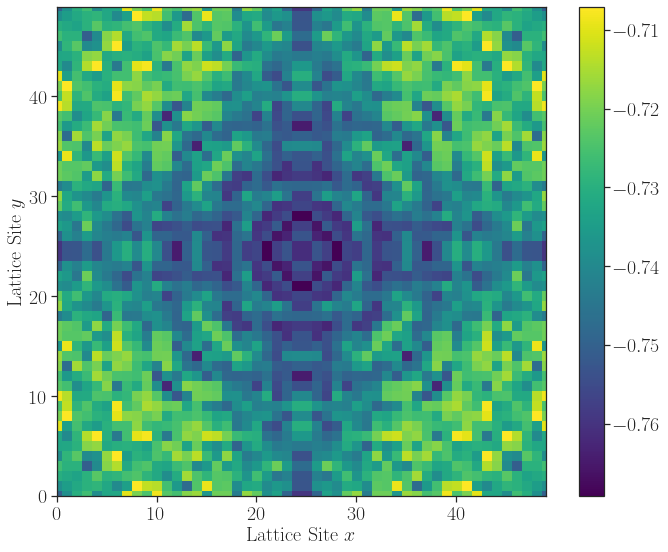

In [3]:
import sys, os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D
from helper import (
    ssd,
    get_dissipator,
    entropy,
    particle_number,
    entropy_density,
    mutual_information_density,
    energy_density,
    particle_density,
    particle_current,
    openSystem,
    closeSystem,
    fermions2D,
    cft_energy,
    prepareState,
    ind_to_coord,
    coord_to_ind,
)
from scipy.optimize import curve_fit
st = sns.axes_style("ticks")
sns.set(style = st,palette = sns.color_palette("muted"), rc={'figure.figsize': (12,9)})
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.sans-serif": ["Computer Modern Roman"]})

def threeDplotED(L,T0,T1,cycles,title, ticksize, fontSize):
    N = L * L
    scale = 1
    T0 = T0*L
    T1 = T1*L
    pbc = True
    hopping = [0, 1, 0.0j]
    R = 0.0
    gl_1 = 0.0
    gl_2 = gl_1 * R
    gr_1 = 0.0
    gr_2 = gr_1 * R
    M = get_dissipator(N, gl_1, gl_2, gr_1, gr_2)
    def foo(x, L):
        return 2 * np.sin(np.pi * (x + 0.5) / L) * np.sin(np.pi * (x + 0.5) / L)

    ham0 = fermions2D(L, lambda i: 1)
    ham1 = fermions2D(L, lambda i: foo(i, L))
    vals, U = np.linalg.eigh(ham0)
    vals1, U1 = np.linalg.eigh(ham1)
    Npar = np.where(vals < 1e-7)[0].shape[0]
    init_state = prepareState(vals, U, Npar, 0)

    measurements = openSystem(
        N,
        T0,
        T1,
        cycles,
        M,
        ham0,
        ham1,
        init_state=init_state,
        observable=lambda state, L: np.real(np.sum(np.multiply(ham0, state), axis=0)),
        use_scipy=False,
    )
    measurements = np.array(measurements)
    measurements = measurements.reshape(-1, L, L)
    x = [i for i in range(0, L)]
    y = [i for i in range(0, L)]
    fig = plt.figure()
    ax = fig.add_subplot(projection = '3d')
    X, Y = np.meshgrid(x,y)
    ax.plot_surface(X,Y, measurements[cycles])
    ax.set_xlim(L-1,0)
    ax.set_ylim(0, L-1)
    ax.tick_params(axis='both', which='major', labelsize=ticksize)
    plt.savefig('{}.pdf'.format(title))
    plt.show()

def heatmapED_2D(L,T0,T1,cycles,title, ticksize, fontSize):
    N = L * L
    scale = 1
    T0 = T0*L
    T1 = T1*L
    pbc = True
    hopping = [0, 1, 0.0j]
    R = 0.0
    gl_1 = 0.0
    gl_2 = gl_1 * R
    gr_1 = 0.0
    gr_2 = gr_1 * R
    M = get_dissipator(N, gl_1, gl_2, gr_1, gr_2)
    def foo(x, L):
        return 2 * np.sin(np.pi * (x + 0.5) / L) * np.sin(np.pi * (x + 0.5) / L)

    ham0 = fermions2D(L, lambda i: 1)
    ham1 = fermions2D(L, lambda i: foo(i, L))
    vals, U = np.linalg.eigh(ham0)
    vals1, U1 = np.linalg.eigh(ham1)
    Npar = np.where(vals < 1e-7)[0].shape[0]
    init_state = prepareState(vals, U, Npar, 0)

    measurements = openSystem(
        N,
        T0,
        T1,
        cycles,
        M,
        ham0,
        ham1,
        init_state=init_state,
        observable=lambda state, L: np.real(np.sum(np.multiply(ham0, state), axis=0)),
        use_scipy=False,
    )
    measurements = np.array(measurements)
    measurements = measurements.reshape(-1, L, L)
    plt.imshow(measurements[cycles], cmap='viridis', interpolation = 'nearest')
    plt.xlim(0, L-1)
    plt.ylim(0, L-1)
    plt.xlabel(r'Lattice Site $x$', fontsize = fontSize)
    plt.ylabel(r'Lattice Site $y$',fontsize = fontSize)
    cb = plt.colorbar()
    cb.ax.tick_params(labelsize=ticksize)
    plt.tick_params(axis='both', which='major', labelsize=ticksize)
    plt.savefig('heatmapED_2D-{}.pdf'.format(title))
    plt.show()
    

# heatmapED_2D(50,0.5,0.5,10,"heating1",20,20)
# heatmapED_2D(50,0.5,0.9,10,"heating2",20,20)
# heatmapED_2D(50,0.2,0.2,10,"heating4",20,20)
# heatmapED_2D(50,0.01,0.01,10,"non-heating2",20,20)
# heatmapED_2D(50,0.1,0.1,10,"heating4",20,20)
heatmapED_2D(50,0.2,0.2,13,"heating6",20,20)

# threeDplotED(3,0.5,0.5,10, "test",20,20)

In [15]:
import sys, os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from helper import (
    ssd,
    get_dissipator,
    entropy,
    particle_number,
    entropy_density,
    mutual_information_density,
    energy_density,
    particle_density,
    particle_current,
    openSystem,
    closeSystem,
    fermions2D,
    cft_energy,
    prepareState,
    ind_to_coord,
    coord_to_ind,
)
from scipy.optimize import curve_fit

import matplotlib
# matplotlib.rcParams.update({"font.size": 14})

st = sns.axes_style("ticks")
sns.set(style = st,palette = sns.color_palette("muted"), rc={'figure.figsize': (12,9)})

# np.set_printoptions(threshold=np.inf)
   
#sns.set(color_codes = True)
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.sans-serif": ["Computer Modern Roman"]})
L = 20 
N = L * L
scale = 1


# T0 = 0.05 * L * scale
# T1 = 0.05 * L * scale

# T0 = 0.95*L
# T1 = 0.05*L


# HEATING
# T0 = -0.05 * L * scale
# T1 = 0.05 * L * scale

cycles = 10
pbc = True
hopping = [0, 1, 0.0j]

R = 0.0
gl_1 = 0.0
gl_2 = gl_1 * R
gr_1 = 0.0
gr_2 = gr_1 * R
M = get_dissipator(N, gl_1, gl_2, gr_1, gr_2)

def foo(x, L):
    return 2 * np.sin(np.pi * (x + 0.5) / L) * np.sin(np.pi * (x + 0.5) / L)

ham0 = fermions2D(L, lambda i: 1)
ham1 = fermions2D(L, lambda i: foo(i, L))
vals, U = np.linalg.eigh(ham0)
vals1, U1 = np.linalg.eigh(ham1)

# print(np.where(vals1 < 1e-10)[0].shape[0])

Npar = np.where(vals < 1e-7)[0].shape[0]
# Npar = int(L/2)
# print(Npar)
init_state = prepareState(vals, U, Npar, 0)


measurements = openSystem(
    N,
    T0,
    T1,
    cycles,
    M,
    ham0,
    ham1,
    init_state=init_state,
    observable= lambda energy, L: L,
    use_scipy=False,
)

print(measurements)
    #### Measurements

    # if i > 0 and measurements[-1] < measurements[-2]:
    #     peak_found = True
    # if peak_found and measurements[-1] > measurements[-2]:
    #     measurements.pop()
    #     break


[400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400]


In [ ]:
fontSize = 18
ticksize = 18


L = 15

N = L * L
scale = 1

# T0 = 0.05 * L * scale
# T1 = 0.05 * L * scale

# T0 = 0.95*L
# T1 = 0.05*L


# HEATING
# T0 = -0.05 * L * scale
# T1 = 0.05 * L * scale

cycles = 5
pbc = True
hopping = [0, 1, 0.0j]

R = 0.0
gl_1 = 0.0
gl_2 = gl_1 * R
gr_1 = 0.0
gr_2 = gr_1 * R
M = get_dissipator(N, gl_1, gl_2, gr_1, gr_2)

def foo(x, L):
    return 2 * np.sin(np.pi * (x + 0.5) / L) * np.sin(np.pi * (x + 0.5) / L)

ham0 = fermions2D(L, lambda i: 1)
ham1 = fermions2D(L, lambda i: foo(i, L))
vals, U = np.linalg.eigh(ham0)
vals1, U1 = np.linalg.eigh(ham1)

# print(np.where(vals1 < 1e-10)[0].shape[0])

Npar = np.where(vals < 1e-7)[0].shape[0]
# Npar = int(L/2)
# print(Npar)
init_state = prepareState(vals, U, Npar, 0)



# T0_list = np.linspace(0, 0.5, 31)
# T1_list = np.linspace(0, 0.5, 31)
T0_list = np.linspace(0, 1, 31)
T1_list = np.linspace(0, 1, 31)
TotalEnergymatrix = np.zeros((len(T0_list), len(T1_list)), dtype = float)
for i in range(0, len(T0_list)):
    for j in range(0, len(T1_list)):
        measurements = openSystem(
            N,
            T0_list[i] * L * scale,
            T1_list[j] * L * scale,
            cycles,
            M,
            ham0,
            ham1,
            init_state=init_state,
            observable=lambda state, L: np.real(np.sum(np.multiply(ham0, state))),
            use_scipy=False,
        )
#         print(measurements[cycles] - measurements[0])
        TotalEnergymatrix[j,i] = measurements[cycles] - measurements[0]
#         print(measurements)
#         measurements = np.array(measurements)
#         np.shape(measurements)
#         measurements = measurements.reshape(-1, L, L)

#         print(np.shape(measurements))
#         TotalEnergymatrix[i,j] = (measurements - measurements[0])
# elist = np.array(elist)
       
print(np.shape(TotalEnergymatrix))                            
# print(elist.shape)
                       
plt.imshow(TotalEnergymatrix, cmap='viridis', interpolation = 'nearest')
# plt.xlim(0, len(T0))
# plt.ylim(0, len(T1))

plt.xlim(0, len(T0_list)-1)
plt.ylim(0, len(T1_list)-1)
clb = plt.colorbar()
clb.ax.tick_params(labelsize=ticksize) 

# clb = plt.colorbar()
# clb.ax.set_title('Total Energy')

# np.where(arr == 15)
# x = [0, 0.5, 1, 1.5 ,2]
x = [0, 15, 30]
label = ['0', '0.5', '1']
# x = [0.0, np.where(T0 == 0.5), np.where(T0 == 1.0), np.where(T0 == 1.5), np.where(T0 == 2.0)]
# x = [0.0, len(T0)/2, len(T0)]
# y = [0.0, len(T1)/2, len(T1)]



# x = [0, 10, 20]
# label = ['0', '0.5', '1']

plt.xticks(x, label, fontsize = ticksize)
plt.yticks(x, label, fontsize = ticksize)

plt.xlabel(r'$T_0/L$', fontsize = fontSize)
plt.ylabel(r'$T_1/L$',fontsize = fontSize)


plt.savefig('PhaseDiagram2D.pdf')
                        
                            
# plt.plot(elist[:, 10], 'b-', label='T = 10')
# plt.xlabel(r'$T_0$')
# plt.ylabel('Energy Change')
# plt.legend()
# plt.tight_layout()
plt.show()

In [4]:
fontSize = 18
ticksize = 18


L = 15

N = L * L
scale = 1

# T0 = 0.05 * L * scale
# T1 = 0.05 * L * scale

# T0 = 0.95*L
# T1 = 0.05*L


# HEATING
# T0 = -0.05 * L * scale
# T1 = 0.05 * L * scale

cycles = 4
pbc = True
hopping = [0, 1, 0.0j]

R = 0.0
gl_1 = 0.0
gl_2 = gl_1 * R
gr_1 = 0.0
gr_2 = gr_1 * R
M = get_dissipator(N, gl_1, gl_2, gr_1, gr_2)

def foo(x, L):
    return 2 * np.sin(np.pi * (x + 0.5) / L) * np.sin(np.pi * (x + 0.5) / L)

ham0 = fermions2D(L, lambda i: 1)
ham1 = fermions2D(L, lambda i: foo(i, L))
vals, U = np.linalg.eigh(ham0)
vals1, U1 = np.linalg.eigh(ham1)

# print(np.where(vals1 < 1e-10)[0].shape[0])

Npar = np.where(vals < 1e-7)[0].shape[0]
# Npar = int(L/2)
# print(Npar)
init_state = prepareState(vals, U, Npar, 0)



T0_list = np.linspace(0, 0.5, 30)
T1_list = np.linspace(0, 0.5, 30 )
TotalEnergymatrix = np.zeros((len(T0_list), len(T1_list)), dtype = float)
for i in range(0, len(T0_list)):
    for j in range(0, len(T1_list)):
        measurements = openSystem(
            N,
            T0_list[i] * L * scale,
            T1_list[j] * L * scale,
            cycles,
            M,
            ham0,
            ham1,
            init_state=init_state,
            observable=lambda state, L: np.real(np.sum(np.multiply(ham0, state))),
            use_scipy=False,
        )
#         print(measurements[cycles] - measurements[0])
        TotalEnergymatrix[j,i] = measurements[cycles] - measurements[0]
#         print(measurements)
#         measurements = np.array(measurements)
#         np.shape(measurements)
#         measurements = measurements.reshape(-1, L, L)

#         print(np.shape(measurements))
#         TotalEnergymatrix[i,j] = (measurements - measurements[0])
# elist = np.array(elist)
       
print(np.shape(TotalEnergymatrix))                            
# print(elist.shape)
                       
plt.imshow(TotalEnergymatrix, cmap='viridis', interpolation = 'nearest')
# plt.xlim(0, len(T0))
# plt.ylim(0, len(T1))

plt.xlim(0, len(T0_list))
plt.ylim(0, len(T1_list))
clb = plt.colorbar()
clb.ax.tick_params(labelsize=ticksize) 

# clb = plt.colorbar()
# clb.ax.set_title('Total Energy')

# np.where(arr == 15)
# x = [0, 0.5, 1, 1.5 ,2]
# x = [0.0, np.where(T0 == 0.5), np.where(T0 == 1.0), np.where(T0 == 1.5), np.where(T0 == 2.0)]
# x = [0.0, len(T0)/2, len(T0)]
# y = [0.0, len(T1)/2, len(T1)]



# x = [0, 10, 20]
# label = ['0', '0.5', '1']

# plt.xticks(x, label)
# plt.yticks(x, label)

plt.xlabel(r'$T_0/L$', fontsize = fontSize)
plt.ylabel(r'$T_1/L$',fontsize = fontSize)

plt.xticks(fontsize=ticksize)
plt.yticks(fontsize=ticksize)

plt.savefig('PhaseDiagram2D.pdf')
                        
                            
# plt.plot(elist[:, 10], 'b-', label='T = 10')
# plt.xlabel(r'$T_0$')
# plt.ylabel('Energy Change')s
# plt.legend()
# plt.tight_layout()
plt.show()

KeyboardInterrupt: 

### Density Profile (Effects of Boundary Condition)

<ipython-input-4-342ab5e14707>:129: ComplexWarning: Casting complex values to real discards the imaginary part
  occupationnumberOBC[i-1,j-1]= term1
<ipython-input-4-342ab5e14707>:164: UserWarning: Z contains NaN values. This may result in rendering artifacts.
  ax.plot_surface(X, Y, arr, linewidth=0.2)


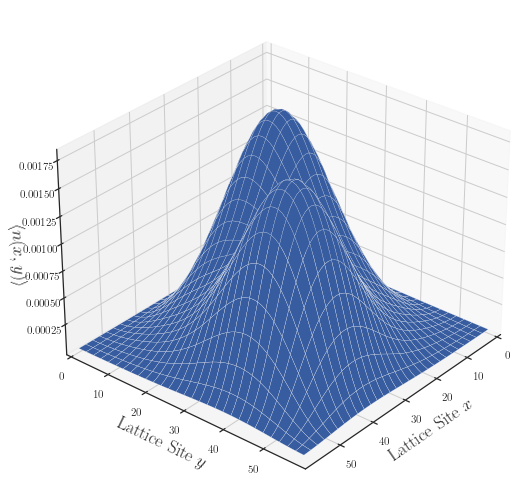

<ipython-input-4-342ab5e14707>:164: UserWarning: Z contains NaN values. This may result in rendering artifacts.
  ax.plot_surface(X, Y, arr, linewidth=0.2)


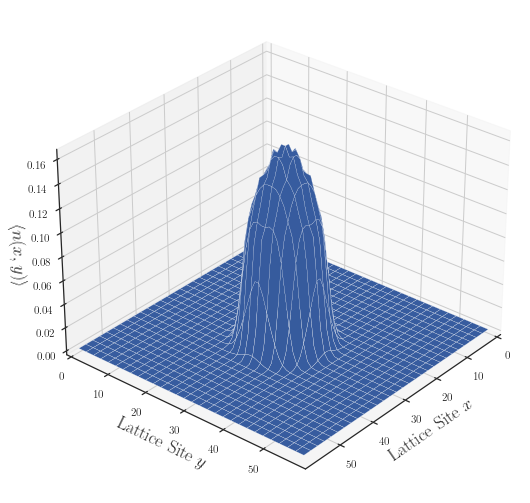

In [4]:
def check_symmetric(a, rtol=1e-05, atol=1e-08):
    return np.allclose(a, a.T, rtol=rtol, atol=atol)

def F(x,y):
    return 2*np.sin(np.pi*x/L)**2*np.sin(np.pi*y/L)**2

L = 60
# Create Basis states
basis = [(x, y) for x in range(1, L+1) for y in range(1, L+1)]
basis1 = [(x, y) for x in range(0, L) for y in range(0, L)]


t_1 = -1
t_2 = -1

H_0 = np.zeros((L**2,L**2))

for n in range(1,L+1):
    for l in range(1,L+1):
        for k in range(1,L+1):
            for m in range(1,L+1):
                for i in [l, n, k, m]:
                    if k == m and l+1 == n:
                        i = basis.index((k, l))
                        j = basis.index((m,n))
                        H_0[i,j] = t_2
                    if k+1 == m and l == n:
                        i = basis.index((k,l))
                        j = basis.index((m,n))
                        H_0[i,j] = t_1 
                    # Symmetric Transposed Matrixelements
                    if k == m and l+1 == n:
                        j = basis.index((k, l))
                        i = basis.index((m,n))
                        H_0[i,j] = t_2
                    if k+1 == m and l == n:
                        j = basis.index((k,l))
                        i = basis.index((m,n))
                        H_0[i,j] = t_1

def ind_to_coord(L, ind):
    x = ind % L
    y = ind // L
    return x, y
def coord_to_ind(L, x, y):
    return y * L + (x) % L


# print(coord_to_ind(30, 21,1))
# print(basis.index((1,21)))
# Coordinates are flipped here for the two methods (my x is his y and vice versa)

# print(basis)

#Should be correct
def fermions2D(L, envelope):
    N = L * L
    ham = np.zeros((N, N), dtype=float)
    for i in range(N):
        x = i % L
        y = i // L
        right = y * L + (x + 1) % L
        down = ((y + 1) % L) * L + x
        ham[i, right] = -envelope(x + 0.5) * envelope(y)
        ham[i, down] = -envelope(x) * envelope(y + 0.5)
        ham[right, i] = np.conjugate(ham[i, right])
        ham[down, i] = np.conjugate(ham[i, down])
    return ham

def F(x):
    return 2*np.sin(np.pi*x/L)**2

def ssd(x, L):
    return np.sin(np.pi * (x + 0.5) / L)**2*np.sin(np.pi * (x + 0.5) / L)**2

hamSSD = fermions2D(L, lambda i: ssd(i, L))
ham0 = fermions2D(L, lambda i: 1)

def F(x,y):
    return 2*np.sin(np.pi*x/L)**2*np.sin(np.pi*y/L)**2

t_1 = -1
t_2 = -1

vals0, U = np.linalg.eigh(ham0)
vals1, V = np.linalg.eigh(hamSSD)

vals0_OBC, U_OBC = np.linalg.eig(H_0)


U_OBC = np.matrix(U_OBC)

U = np.matrix(U)
V = np.matrix(V)

NparOB = np.where(vals0_OBC < 1e-7)[0].shape[0]
NparSSD = np.where(vals1 < 1e-7)[0].shape[0]
Npar = np.where(vals0 < 1e-7)[0].shape[0]


# Half filling
NparOB = int(L/2)
NparSSD = int(L/2)
Npar = int(L/2)
                                                          

NparOB = 2

def prepareState(vals, vecs, N):
    Wbar = np.matrix(vecs)
    init_state = Wbar[:, :N] @ ((Wbar.H)[:N, :])
    return init_state

state_tightbinding = U[:,:Npar]@((U.H))[:Npar,:]
state_tightbindingOBC = U_OBC[:,:NparOB]@((U_OBC.H))[:NparOB,:]
state_SSD = V[:,:NparSSD]@((V.H)[:NparSSD,:])


occupationnumberOBC = np.zeros((L, L), dtype =float)
occupationnumberPBC = np.zeros((L, L), dtype =float)
occupationnumberSSD = np.zeros((L,L), dtype= float)


for i in range(1, L+1):
    for j in range(1, L+1):
        term1 = state_tightbindingOBC[basis.index((i,j)),basis.index((i,j))]
#         print(term1)
#         term2 = state[basis.index((j,i)),basis.index((j,i))]
        occupationnumberOBC[i-1,j-1]= term1

for i in range(0, L):
    for j in range(0, L):
        occupationnumberPBC[i,j] = state_tightbinding[basis1.index((i,j)), basis1.index((i,j))]
        occupationnumberSSD[i,j] = state_SSD[basis1.index((i,j)), basis1.index((i,j))]
        
        
def heatmap2d(arr: np.ndarray):
    plt.imshow(arr, cmap='viridis', interpolation = 'nearest')
#     plt.imshow(arr, cmap='winter', interpolation = 'nearest')
#     plt.imshow(arr, cmap= 'magma', interpolation = 'nearest')
    plt.colorbar()
    plt.xlim(0, L-1)
    plt.ylim(0, L-1)
    plt.xlabel(r'Lattice Site $x$', fontsize = 18)
    plt.ylabel(r'Lattice Site $y$',fontsize = 18)
    plt.show()

    
def threeDplotDensity2(arr: np.ndarray, L, title):
    x = [i for i in range(0, L-1)]
    y = [i for i in range(0, L-1)]
    fig = plt.figure()
    ax = fig.add_subplot(projection = '3d')
    ax.set_xlim(0, L-1)
    ax.set_ylim(0, L-1)
#     ax.set_zlim(0.48, 0.53)
    ax.view_init(30, 40)
    X, Y = np.meshgrid(x,y)
    arr[0, L-1] = np.nan
    arr[L-1, 0] = np.nan
    arr[L-1, L-1] = np.nan  
    arr[0,0] = np.nan
    arr = arr[0:int(L-1),0:int(L-1)] 
    ax.plot_surface(X, Y, arr, linewidth=0.2)
    ax.set_xlabel(r'Lattice Site $x$', fontsize = 18)
    ax.set_ylabel(r'Lattice Site $y$',fontsize = 18)
    ax.set_zlabel(r'$\langle n(x,y) \rangle$', fontsize = 18)
    plt.savefig('{}.pdf'.format(title))
    plt.show()
    
def threeDplotDensity(arr: np.ndarray, L, title):
    x = [i for i in range(1, L-1)]
    y = [i for i in range(30, L-1)]
    print(np.shape(arr))
#     y = [i for i in range(0, L)]
    fig = plt.figure()
    ax = fig.add_subplot(projection = '3d')
    ax.set_xlim(1, L-1)
    ax.set_ylim(30, L-1)
#     ax.set_zlim(0.48, 0.53)
#     ax.view_init(20, 270)
    ax.view_init(20, 0)
#     ax.set_zlim(0.48,0.53)
    
    X, Y = np.meshgrid(x,y)
    arr = arr[30:int(L-1),1:int(L-1)]
    

def threeDplotDensity3(arr: np.ndarray, L, title):
    x = [i for i in range(0, L)]
    y = [i for i in range(30, L)]
    fig = plt.figure()
    ax = fig.add_subplot(projection = '3d')
    ax.set_xlim(0, L)
    ax.set_ylim(30, L)
#     ax.set_zlim(0.49, 0.52)
#     ax.view_init(20, 270)
    ax.view_init(20, 300)
#     ax.set_zlim(0.48,0.53)
    
    X, Y = np.meshgrid(x,y)
    arr[0, L-1] = np.nan
    arr[L-1, 0] = np.nan
    arr[L-1, L-1] = np.nan     
        
    arr = arr[30:int(L),0:int(L)]
    ax.plot_surface(X, Y, arr, linewidth=0.2)
    
    plt.savefig('{}.pdf'.format(title))
    plt.show()


threeDplotDensity2(occupationnumberOBC, L, 'DensityprofileOBC_hf')
# heatmap2d(occupationnumberOBC)
# heatmap2d(occupationnumberSSD)
# heatmap2d(occupationnumberPBC)
# threeDplotDensity2(occupationnumberPBC, L, 'DensityprofilePBC')
threeDplotDensity2(occupationnumberSSD, L, 'DensityprofileSSD_hf')

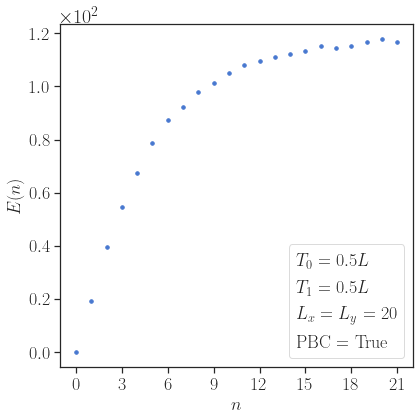

In [14]:
import sys, os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.patches as mpl_patches
from helper import (
    ssd,
    get_dissipator,
    entropy,
    particle_number,
    entropy_density,
    mutual_information_density,
    energy_density,
    particle_density,
    particle_current,
    openSystem,
    closeSystem,
    fermions2D,
    cft_energy,
    prepareState,
    ind_to_coord,
    coord_to_ind,
)


fontSize = 18
ticksize = 18


L = 20

N = L * L
scale = 1

# T0 = 0.05 * L * scale
# T1 = 0.05 * L * scale

# T0 = 0.95*L
# T1 = 0.05*L


# HEATING
# T0 = -0.05 * L * scale
# T1 = 0.05 * L * scale

# cycles = 5
pbc = True
hopping = [0, 1, 0.0j]

R = 0.0
gl_1 = 0.0
gl_2 = gl_1 * R
gr_1 = 0.0
gr_2 = gr_1 * R
M = get_dissipator(N, gl_1, gl_2, gr_1, gr_2)

def foo(x, L):
    return 2 * np.sin(np.pi * (x + 0.5) / L) * np.sin(np.pi * (x + 0.5) / L)

ham0 = fermions2D(L, lambda i: 1)
ham1 = fermions2D(L, lambda i: foo(i, L))
vals, U = np.linalg.eigh(ham0)
vals1, U1 = np.linalg.eigh(ham1)

# print(np.where(vals1 < 1e-10)[0].shape[0])

Npar = np.where(vals < 1e-7)[0].shape[0]
# Npar = int(L/2)
# print(Npar)
init_state = prepareState(vals, U, Npar, 0)



# T0_list = np.linspace(0, 0.5, 31)
# T1_list = np.linspace(0, 0.5, 31)

# NON-HEATING
# T0 = 0.05
# T1 = 0.05


T1 = 0.5
T0 = 0.5

# T1 = 0.05
# T0 = 0.5


# Ran this before (non Heating)
# T0 = 0.02
# T1 = 0.3

# HEATING
# T0 = 0
# T1 = 0.02


cycles = 21

measurements = openSystem(
    N,
    T0 * L * scale,
    T1 * L * scale,
    cycles,
    M,
    ham0,
    ham1,
    init_state=init_state,
    observable=lambda state, L: np.real(np.sum(np.multiply(ham0, state))),
    use_scipy=False,
)

measurement = measurements - measurements[0]
n = [i for i in range(cycles+1)]

fig, ax2 = plt.subplots(1,1, figsize = (6,6))
ax2.plot(n,measurement, '.', linewidth = 1, markersize = 7)
# ax2.plot(n,measurement, '--', linewidth = 1, color = 'grey')
    
#     ax2.text(-1, 0.004, r"$T_0$ = {}L".format(T_0), color="black", fontsize=fontSize)
#     ax2.text(-1, 0.0042, r"$T_1$ = {}L".format(T_1), color="black", fontsize=fontSize)
#     ax2.text(-1, 0.0044, r"$L$ = {}".format(L), color="black", fontsize=fontSize)
#     ax2.text(-1, 0.0046, r"PBC = {}".format(PBC), color = "black", fontsize=fontSize)

formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) 
formatter.set_powerlimits((-1,1)) 
#     ax2.xaxis.set_ticks(np.arange(0,cycles1,2))
plt.xticks(fontsize=ticksize)
plt.yticks(fontsize=ticksize)

handles = [mpl_patches.Rectangle((0, 0), 1, 1, fc="white", ec="white", 
                                 lw=0, alpha=0)] * 4

ticks = [0,3,6,9,12,15,18,21]
labels = []
labels.append(r"$T_0 = {}L$".format(T0))
labels.append(r"$T_1 = {}L$".format(T1))
labels.append(r"$L_x = L_y$ = {}".format(L))
labels.append(r"PBC = True")

ax2.legend(handles, labels, loc='best', fontsize=fontSize, 
      fancybox=True, framealpha=0.7, 
      handlelength=0, handletextpad=0)
    
ax2.yaxis.set_major_formatter(formatter) 
ax2.set_xticks(ticks)
tx = ax2.yaxis.get_offset_text()
tx.set_fontsize(20)
    
    
ax2.set_ylabel(r"$E(n)$", fontsize = fontSize)
ax2.set_xlabel(r"$n$", fontsize=fontSize)
plt.tight_layout()
plt.savefig('TotalEnergyHeating2d1.pdf')
plt.show()



# Total_Energy_array = [None] * (len(n))



#         print(measurements)
#         measurements = np.array(measurements)
#         np.shape(measurements)
#         measurements = measurements.reshape(-1, L, L)

#         print(np.shape(measurements))
#         TotalEnergymatrix[i,j] = (measurements - measurements[0])
# elist = np.array(elist)
                           
# plt.xlim(0, len(T0))
# plt.ylim(0, len(T1))

# plt.plot(n, measurement, '.')


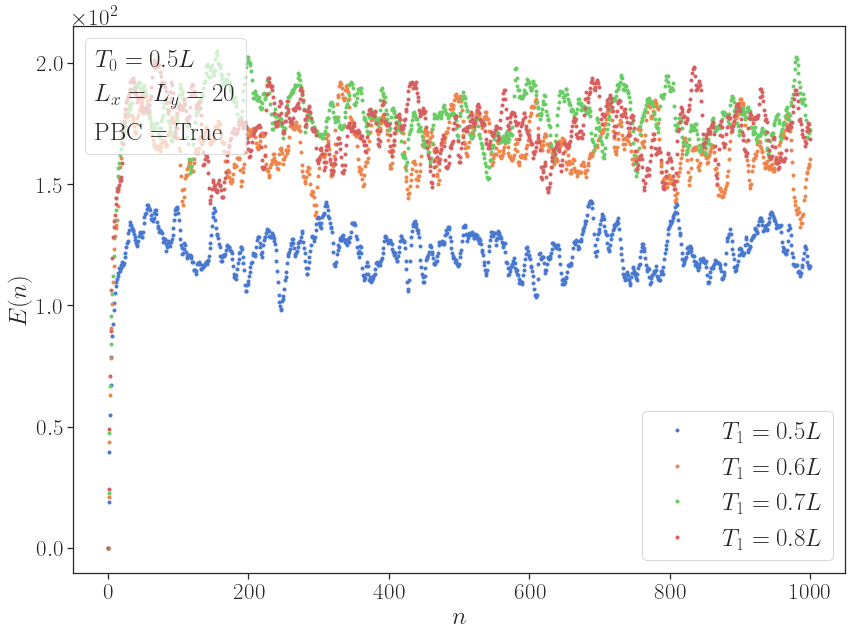

In [48]:
import sys, os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.patches as mpl_patches
from helper import (
    ssd,
    get_dissipator,
    entropy,
    particle_number,
    entropy_density,
    mutual_information_density,
    energy_density,
    particle_density,
    particle_current,
    openSystem,
    closeSystem,
    fermions2D,
    cft_energy,
    prepareState,
    ind_to_coord,
    coord_to_ind,
)


fontSize = 25
ticksize = 23

L = 20

N = L * L
scale = 1

# T0 = 0.05 * L * scale
# T1 = 0.05 * L * scale

# T0 = 0.95*L
# T1 = 0.05*L


# HEATING
# T0 = -0.05 * L * scale
# T1 = 0.05 * L * scale

# cycles = 5
pbc = True
hopping = [0, 1, 0.0j]

R = 0.0
gl_1 = 0.0
gl_2 = gl_1 * R
gr_1 = 0.0
gr_2 = gr_1 * R
M = get_dissipator(N, gl_1, gl_2, gr_1, gr_2)

def foo(x, L):
    return 2 * np.sin(np.pi * (x + 0.5) / L) * np.sin(np.pi * (x + 0.5) / L)

ham0 = fermions2D(L, lambda i: 1)
ham1 = fermions2D(L, lambda i: foo(i, L))
vals, U = np.linalg.eigh(ham0)
vals1, U1 = np.linalg.eigh(ham1)

# print(np.where(vals1 < 1e-10)[0].shape[0])

Npar = np.where(vals < 1e-7)[0].shape[0]
# Npar = int(L/2)
# print(Npar)
init_state = prepareState(vals, U, Npar, 0)


T_1 = [0.5,0.6,0.7,0.8]
T0 = 0.5

cycles = 1000

measurements1 = openSystem(
    N,
    T0 * L * scale,
    T_1[0] * L * scale,
    cycles,
    M,
    ham0,
    ham1,
    init_state=init_state,
    observable=lambda state, L: np.real(np.sum(np.multiply(ham0, state))),
    use_scipy=False,
)

measurements2 = openSystem(
    N,
    T0 * L * scale,
    T_1[1] * L * scale,
    cycles,
    M,
    ham0,
    ham1,
    init_state=init_state,
    observable=lambda state, L: np.real(np.sum(np.multiply(ham0, state))),
    use_scipy=False,
)

measurements3 = openSystem(
    N,
    T0 * L * scale,
    T_1[2] * L * scale,
    cycles,
    M,
    ham0,
    ham1,
    init_state=init_state,
    observable=lambda state, L: np.real(np.sum(np.multiply(ham0, state))),
    use_scipy=False,
)

measurements4 = openSystem(
    N,
    T0 * L * scale,
    T_1[3] * L * scale,
    cycles,
    M,
    ham0,
    ham1,
    init_state=init_state,
    observable=lambda state, L: np.real(np.sum(np.multiply(ham0, state))),
    use_scipy=False,
)

measurement1 = measurements1 - measurements1[0]
measurement2 = measurements2 - measurements2[0]
measurement3 = measurements3 - measurements3[0]
measurement4 = measurements4 - measurements4[0]

n = [i for i in range(cycles+1)]
fig, ax2 = plt.subplots(1,1, figsize = (12,9))
ax2.plot(n,measurement1, '.', linewidth = 1, label =r'$T_1 = {}L$'.format(T_1[0]))
ax2.plot(n,measurement2, '.', linewidth = 1, label =r'$T_1 = {}L$'.format(T_1[1]))
ax2.plot(n,measurement3, '.', linewidth = 1, label =r'$T_1 = {}L$'.format(T_1[2]))
ax2.plot(n,measurement4, '.', linewidth = 1, label =r'$T_1 = {}L$'.format(T_1[3]))
# ax2.plot(n,measurement, '--', linewidth = 1, color = 'grey')
    
#     ax2.text(-1, 0.004, r"$T_0$ = {}L".format(T_0), color="black", fontsize=fontSize)
#     ax2.text(-1, 0.0042, r"$T_1$ = {}L".format(T_1), color="black", fontsize=fontSize)
#     ax2.text(-1, 0.0044, r"$L$ = {}".format(L), color="black", fontsize=fontSize)
#     ax2.text(-1, 0.0046, r"PBC = {}".format(PBC), color = "black", fontsize=fontSize)

handles = [mpl_patches.Rectangle((0, 0), 1, 1, fc="white", ec="white", 
                                 lw=0, alpha=0)] * 3

labels = []
labels.append(r'$T_0 = {}L$'.format(T0))
labels.append(r'$L_x = L_y$ = {}'.format(L))
labels.append(r'PBC = True')

leg = ax2.legend(handles, labels, loc='upper left', fontsize=fontSize, 
      fancybox=True, framealpha=0.7, 
      handlelength=0, handletextpad=0)

formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) 
formatter.set_powerlimits((-1,1)) 
#     ax2.xaxis.set_ticks(np.arange(0,cycles1,2))
plt.xticks(fontsize=ticksize)
plt.yticks(fontsize=ticksize)

ax2.legend(fontsize = fontSize, loc = 'lower right')
ax2.add_artist(leg)
    
ax2.yaxis.set_major_formatter(formatter) 
tx = ax2.yaxis.get_offset_text()
tx.set_fontsize(fontSize-2)
    
    
ax2.set_ylabel(r'$E(n)$', fontsize = fontSize)
ax2.set_xlabel(r'$n$', fontsize=fontSize)
plt.tight_layout()
plt.savefig('TotalEnergyHeating2d_Multiple.pdf')
plt.show()

## Structure Hamiltonian

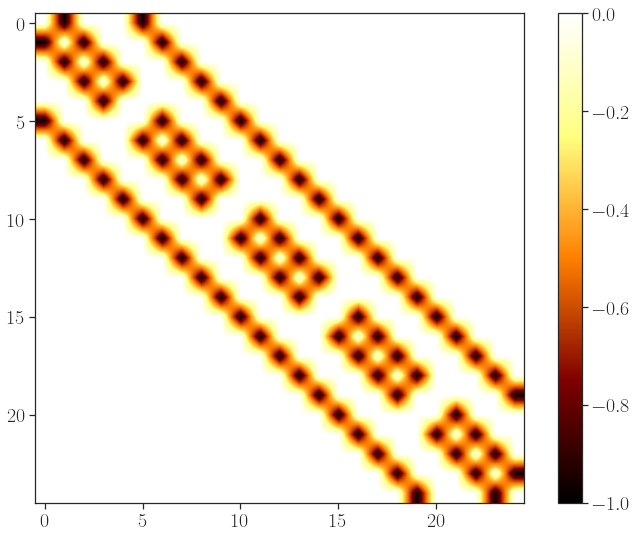

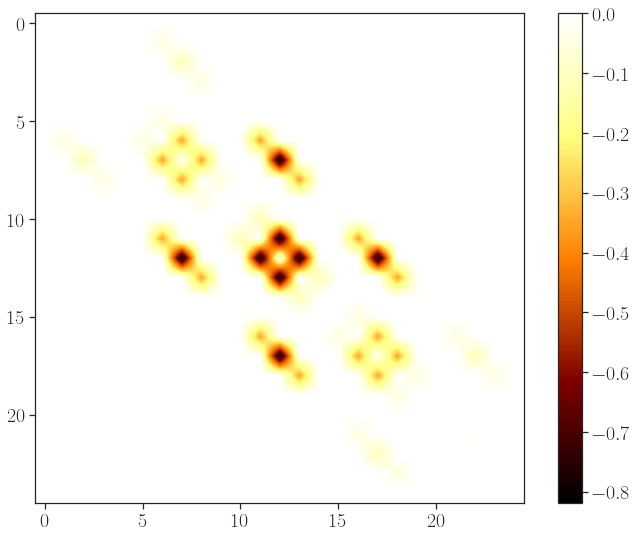

In [120]:
ticksize = 20

# def fermions2D(L, envelope, pbc: bool):
#         N = L * L
#         ham = np.zeros((N, N), dtype=float)
#         for i in range(N):
#             x = i % L
#             y = i // L
# #             print(x)
# #             print(i)
# #             print(y)
#             right = y * L + (x + 1) % L
#             down = ((y + 1) % L) * L + x
#             ham[i, right] = -envelope(x + 0.5) * envelope(y)
#             ham[i, down] = -envelope(x) * envelope(y + 0.5)
#             ham[right, i] = np.conjugate(ham[i, right])
#             ham[down, i] = np.conjugate(ham[i, down])
                    
#         return ham


# ham0 = fermions2D(3, lambda i: 1, True)

L=5
basis = [(x, y) for x in range(1, L+1) for y in range(1, L+1)]

t_1 = -1
t_2 = -1

H_0 = np.zeros((L**2,L**2))




for n in range(1,L+1):
    for l in range(1,L+1):
        for k in range(1,L+1):
            for m in range(1,L+1):
                for i in [l, n, k, m]:
                    if k == m and l+1 == n:
                        i = basis.index((k, l))
                        j = basis.index((m,n))
                        H_0[i,j] = t_2
                    if k+1 == m and l == n:
                        i = basis.index((k,l))
                        j = basis.index((m,n))
                        H_0[i,j] = t_1 
                    # Symmetric Transposed Matrixelements
                    if k == m and l+1 == n:
                        j = basis.index((k, l))
                        i = basis.index((m,n))
                        H_0[i,j] = t_2
                    if k+1 == m and l == n:
                        j = basis.index((k,l))
                        i = basis.index((m,n))
                        H_0[i,j] = t_1
#                 # Periodic Boundary Conditions
#                 if l == L and n == 1 and k == m:
#                     i = basis.index((k,l))
#                     j = basis.index((m,n))
#                     H_0[i,j] = t_2
#                 if k == L and m == 1 and l == n:
#                     i = basis.index((k,l))
#                     j = basis.index((m,n))
#                     H_0[i,j] = t_1
#                 if l == L and n == 1 and k == m:
#                     j = basis.index((k,l))
#                     i = basis.index((m,n))
#                     H_0[i,j] = t_2
#                 if k == L and m == 1 and l == n:
#                     j = basis.index((k,l))
#                     i = basis.index((m,n))
#                     H_0[i,j] = t_1

plt.imshow(H_0, cmap = 'afmhot', interpolation = 'bilinear')
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=ticksize)
plt.xticks(fontsize=ticksize)
plt.yticks(fontsize=ticksize)
# plt.savefig('ColorMapMatrixH0_SSD.pdf')
# ax2.imshow(MatrixColorMap(15,False)[0], cmap = 'afmhot', interpolation = 'bilinear')
# ax2.imshow(MatrixColorMap(15,True)[1], cmap = 'afmhot', interpolation = 'bilinear')
# ax1.imshow(MatrixColorMap(10,True)[0], cmap = 'winter')
# ax2.imshow(MatrixColorMap(10 ,True)[1], cmap = 'winter')
plt.savefig('ColorMapMatrixH0_OBC_2D.pdf')
plt.show()


def MatrixColorMap(L, pbc):
    def fermions2D2(L, envelope, pbc:bool):
        N = L * L
        ham = np.zeros((N, N), dtype=float)
        for i in range(N):
            if pbc == True:
                x = i % L
                y = i // L
                right = y * L + (x + 1) % L
                down = ((y + 1) % L) * L + x
    #             print(down)
                ham[i, right] = -envelope(x + 0.5) * envelope(y)
                ham[i, down] = -envelope(x) * envelope(y + 0.5)
                ham[right, i] = np.conjugate(ham[i, right])
                ham[down, i] = np.conjugate(ham[i, down])
            if pbc==False:
                x = i % L
                y = i // L
                if x != L and y != L:
                    right = y * L + (x + 1) % L
                    down = ((y + 1) % L) * L + x
        #             print(down)
                    ham[i, right] = -envelope(x + 0.5) * envelope(y)
                    ham[i, down] = -envelope(x) * envelope(y + 0.5)
                    ham[right, i] = np.conjugate(ham[i, right])
                    ham[down, i] = np.conjugate(ham[i, down])
                if x == L: 
                    right = y * L + (x + 1) % L
                    down = ((y + 1) % L) * L + x
                    ham[i, right] = 0
                    ham[i, down] = 0
                    ham[right, i] = np.conjugate(ham[i, right])
                    ham[down, i] = np.conjugate(ham[i, down])
                elif y == L:
                    right = y * L + (x + 1) % L
                    down = ((y + 1) % L) * L + x
                    ham[i, right] = 0
                    ham[i, down] = 0
                    ham[right, i] = np.conjugate(ham[i, right])
                    ham[down, i] = np.conjugate(ham[i, down])
        return ham

    def F(x):
        return 2*np.sin(np.pi*x/L)**2

    def ssd(x, L):
        return np.sin(np.pi * (x + 0.5) / L)**2*np.sin(np.pi * (x + 0.5) / L)**2

    hamSSD = fermions2D2(L, lambda i: ssd(i, L), True)
    ham0 = fermions2D2(L, lambda i: 1, False)
    return [ham0, hamSSD]

# fig = plt.figure()
# ax1 = fig.add_subplot(121)
# ax2 = fig.add_subplot(122)
matrix = MatrixColorMap(5,False)[1]
plt.imshow(matrix, cmap = 'afmhot', interpolation = 'bilinear')
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=ticksize)
plt.xticks(fontsize=ticksize)
plt.yticks(fontsize=ticksize)
plt.savefig('ColorMapMatrixH0_SSD_2D.pdf')
# ax2.imshow(MatrixColorMap(15,False)[0], cmap = 'afmhot', interpolation = 'bilinear')
# ax2.imshow(MatrixColorMap(15,True)[1], cmap = 'afmhot', interpolation = 'bilinear')
# ax1.imshow(MatrixColorMap(10,True)[0], cmap = 'winter')
# ax2.imshow(MatrixColorMap(10 ,True)[1], cmap = 'winter')
plt.show()

### Eigenstate Profile

3600


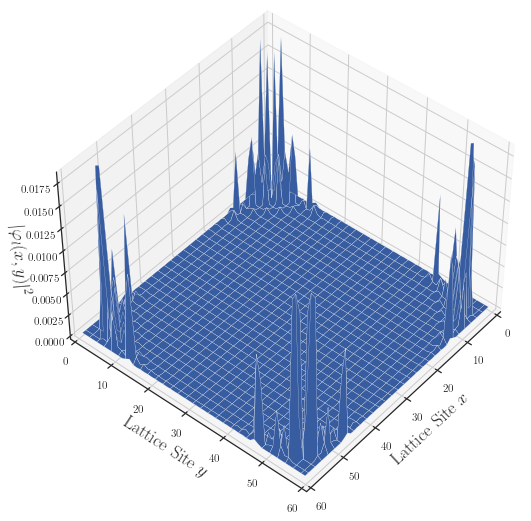

3600


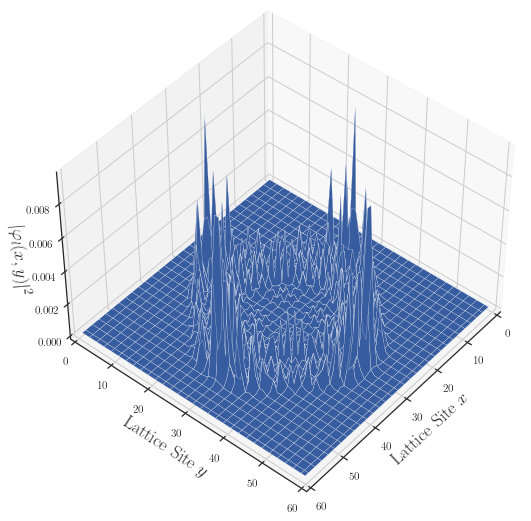

3600


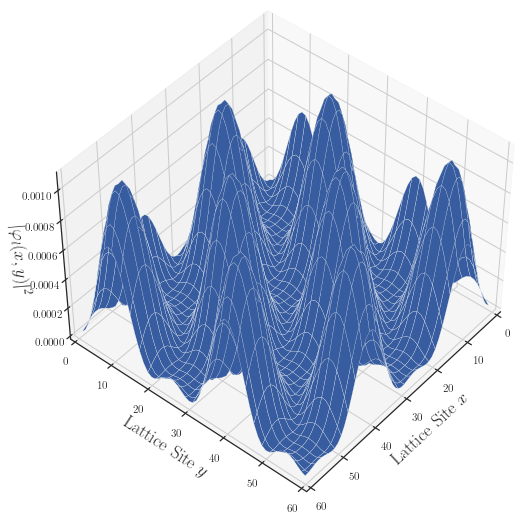

3600


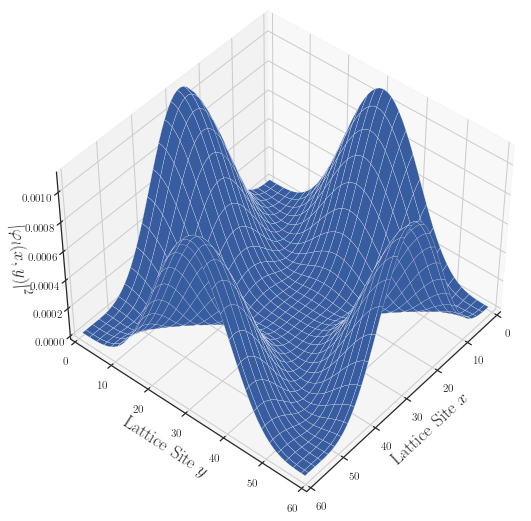

In [104]:
def check_symmetric(a, rtol=1e-05, atol=1e-08):
    return np.allclose(a, a.T, rtol=rtol, atol=atol)

def F(x,y):
    return 2*np.sin(np.pi*x/L)**2*np.sin(np.pi*y/L)**2

L = 60
# Create Basis states
basis = [(x, y) for x in range(1, L+1) for y in range(1, L+1)]
basis1 = [(x, y) for x in range(0, L) for y in range(0, L)]

def ssd(x, L):
    return np.sin(np.pi * (x + 0.5) / L)**2*np.sin(np.pi * (x + 0.5) / L)**2

def ind_to_coord(L, ind):
    x = ind % L
    y = ind // L
    return x, y
def coord_to_ind(L, x, y):
    return y * L + (x) % L

def fermions2D(L, envelope):
    N = L * L
    ham = np.zeros((N, N), dtype=float)
    for i in range(N):
        x = i % L
        y = i // L
        right = y * L + (x + 1) % L
        down = ((y + 1) % L) * L + x
        ham[i, right] = -envelope(x + 0.5) * envelope(y)
        ham[i, down] = -envelope(x) * envelope(y + 0.5)
        ham[right, i] = np.conjugate(ham[i, right])
        ham[down, i] = np.conjugate(ham[i, down])
    return ham

def eigenstate_profileSSD(L,eigenstate_nr:int):
    hamSSD = fermions2D(L, lambda i: ssd(i, L))
    vals1, V = np.linalg.eigh(hamSSD)
    print(np.size(vals1))
    V = np.matrix(V)
    state_SSD = V[:,(eigenstate_nr-1):eigenstate_nr]@((V.H))[(eigenstate_nr-1):eigenstate_nr,:]
    occupationnumberSSD = np.zeros((L,L), dtype= float)
    for i in range(0,L):
        for j in range(0, L):
            occupationnumberSSD[i,j] = state_SSD[basis1.index((i,j)), basis1.index((i,j))]
    return occupationnumberSSD


def eigenstate_profileH0(L,eigenstate_nr:int):
    ham0 = fermions2D(L, lambda i: 1)
    vals0, U = np.linalg.eigh(ham0)
    print(np.size(vals0))
    U = np.matrix(U)
    state = U[:,(eigenstate_nr-1):eigenstate_nr]@((U.H))[(eigenstate_nr-1):eigenstate_nr,:]
    occupationnumber = np.zeros((L,L), dtype= float)
    for i in range(0,L):
        for j in range(0, L):
            occupationnumber[i,j] = state[basis1.index((i,j)), basis1.index((i,j))]
    return occupationnumber


def threeDplot_eigenstate(arr: np.ndarray, L, title):
    x = [i for i in range(0, L)]
    y = [i for i in range(0, L)]
    fig = plt.figure()
    ax = fig.add_subplot(projection = '3d')
    ax.set_xlim(0, L)
    ax.set_ylim(0, L)
#     ax.set_zlim(0.48, 0.53)
    ax.view_init(45, 40)
    X, Y = np.meshgrid(x,y)
    arr = arr[0:int(L),0:int(L)] 
    ax.plot_surface(X, Y, arr, linewidth=0.2)
    ax.set_xlabel(r'Lattice Site $x$', fontsize = 18)
    ax.set_ylabel(r'Lattice Site $y$',fontsize = 18)
    ax.set_zlabel(r'$|\varphi_l(x,y)|^2$', fontsize = 18)
    plt.savefig('{}.pdf'.format(title))
    plt.show()
    
    
threeDplot_eigenstate(eigenstate_profileSSD(L, 1600),L,"eigenstate_profile2D")
threeDplot_eigenstate(eigenstate_profileSSD(L, 501), L, "eigenstate_profile2D-1")
threeDplot_eigenstate(eigenstate_profileH0(L,12),L,"eigenstate_profile2D_H0")
threeDplot_eigenstate(eigenstate_profileH0(L,2),L,"eigenstate_profile2D_H0-2")